In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from google.colab import drive
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss#same as cross-entropy
#drive.mount('/content/drive')

In [5]:
#Loading the dataset to a Pandas DataFrame
#from google.colab import drive
#drive.mount('/content/drive', force_remount= True)
#data = pd.read_csv('/content/drive/MyDrive/ML_Project/project/data/creditcard.csv')

#for Scott's testing (my directory in Drive is bugged, please send Help)
#data = pd.read_csv('/content/drive/MyDrive/ML_Project (1)/project/data/creditcard.csv')

In [6]:
#because upper block was giving me errors, can delete this later as alternate import
data = pd.read_csv('/content/creditcard.csv')
#data = pd.read_csv('/content/drive/MyDrive/ML_Project/project/data/creditcard.csv')

In [7]:
# Printing the first 5 rows of the dataset

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
# Basic statistics of dataset

data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
# Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
# Checking for null values

data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
# Total number of legitimate and fraudulent transactions

data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

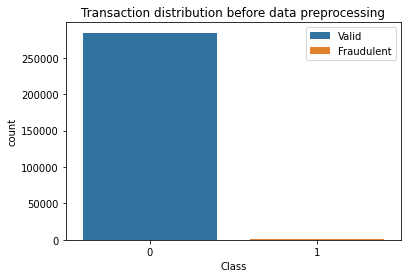

In [12]:
# Transaction distribution before data preprocessing

plot = sns.countplot(data=data, x='Class', hue='Class', dodge=False).set(title='Transaction distribution before data preprocessing')
plt.legend(labels=["Valid", "Fraudulent"], loc=1)
plt.show()

Anomaly Detection

In [13]:
# Checking for duplicates

data.duplicated().sum()

1081

In [14]:
# Dropping the duplicate entries

data.drop_duplicates(inplace=True)
print(data.shape)

(283726, 31)


Text(0.5, 1.0, 'Before removing outliers')

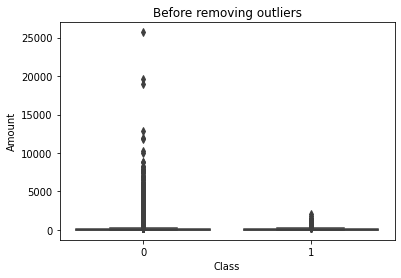

In [15]:
# Checking for outliers

sns.boxplot(x="Class", y="Amount", data=data)
plt.title("Before removing outliers")


Text(0.5, 1.0, 'After removing outliers')

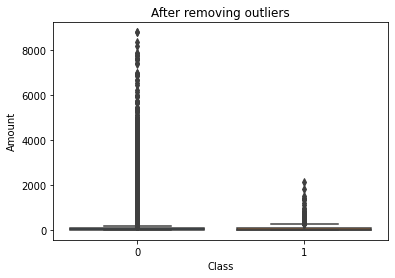

In [16]:
# Removing the outliers

def drop_outliers(df, field):
  df.drop(df[df[field] > 9500].index, inplace=True)

drop_outliers(data, 'Amount')
sns.boxplot(x="Class", y="Amount", data=data)
plt.title("After removing outliers")

In [17]:
# Centering Amount col around 0 and scaling standard deviation to 1
data["Amount"] = data["Amount"].subtract(data["Amount"].mean()).divide(data["Amount"].std())

data[["Amount"]].describe()

,Amount
count,2.837180e+05
mean,2.515411e-13
std,1.000000e+00
min,-3.736354e-01
25%,-3.498717e-01
50%,-2.802780e-01
75%,-4.476277e-02
max,3.692799e+01


In [18]:
# Splitting the dataset

# 0 -> Legitimate Transactions
# 1 -> Fradulent Transaction

legitimate = data[data.Class == 0]
fraudulent = data[data.Class == 1]

# Description of legitimate and fraudulent transactions
pd.merge(legitimate.Amount.describe(),fraudulent.Amount.describe(), left_index=True, right_index=True, suffixes=('_Legitimate','_Fraudulent'))

,Amount_Legitimate,Amount_Fraudulent
count,283245.000000,473.000000
mean,-0.000254,0.152017
std,0.999800,1.104210
min,-0.373635,-0.373635
25%,-0.349575,-0.369392
50%,-0.280278,-0.331964
75%,-0.045102,0.075711
max,36.927989,8.647532


In [19]:
# Converts unit of time from seconds to hours and center at mean 0

data['Time'] = data['Time'].subtract(data['Time'].mean()).div(60 * 60)
data[['Time']].describe()

,Time
count,2.837180e+05
mean,1.294693e-13
std,1.318914e+01
min,-2.633633e+01
25%,-1.127883e+01
50%,-2.810918e+00
75%,1.235755e+01
max,2.166144e+01


[Text(0.5, 1.0, 'Time (Hours)')]

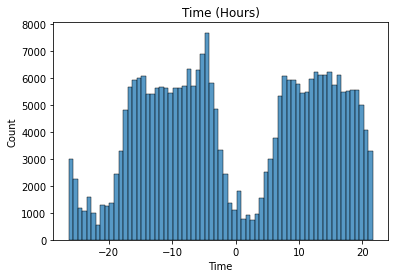

In [20]:
sns.histplot(data=data, x="Time").set(title='Time (Hours)')

In [21]:
numFraudForPercentages = fraudulent.Amount.count()
numValidForPercentages = legitimate.Amount.count()
print("Percent fraud: ", (numFraudForPercentages / (numFraudForPercentages + numValidForPercentages)))
print("Percent valid: ", (numValidForPercentages / (numFraudForPercentages + numValidForPercentages)))

Percent fraud:  0.0016671483656306614
Percent valid:  0.9983328516343694


In [22]:
# save pre-smoted data for other forms of pre-processing later
#pre_smote_data = data

In [23]:
from imblearn.over_sampling import SMOTE

def perform_smote(data):
  pre_smote_a = data.loc[:, data.columns != 'Class'] # all cols except for Class
  pre_smote_b = data.loc[:, data.columns == 'Class'] # only Class col

  smote_a, smote_b = SMOTE(random_state=5).fit_resample(pre_smote_a, pre_smote_b)
  smote_value_counts = smote_b["Class"].value_counts()
  print("Num fraud after SMOTE: %i" % smote_value_counts[0])
  print("Num valid after SMOTE: %i" % smote_value_counts[0])

  return pd.concat([smote_a, smote_b], axis=1)

In [24]:
# Merge smote_x and smote_y to update data
#data = perform_smote(data)

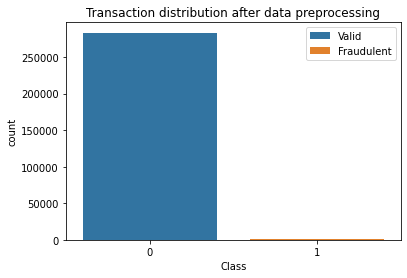

In [25]:
# Transaction distribution after data preprocessing

plot = sns.countplot(data=data, x='Class', hue='Class', dodge=False).set(title='Transaction distribution after data preprocessing')
plt.legend(labels=["Valid", "Fraudulent"], loc=1)
plt.show()

In [26]:
# Basic statistics of dataset after data preprocessing

data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.837180e+05,283718.000000,283718.000000,283718.000000,283718.000000,283718.000000,283718.000000,283718.000000,283718.000000,283718.000000,...,283718.000000,283718.000000,283718.000000,283718.000000,283718.000000,283718.000000,283718.000000,283718.000000,2.837180e+05,283718.000000
mean,1.294693e-13,0.006636,-0.003007,0.002157,-0.003294,0.002631,-0.001577,0.000901,-0.000655,-0.001551,...,-0.000471,0.000126,0.000525,0.000187,-0.000129,0.000169,0.001690,0.000556,2.515411e-13,0.001667
std,1.318914e+01,1.942769,1.630925,1.503939,1.412682,1.356573,1.323796,1.200968,1.177746,1.095438,...,0.721670,0.723547,0.617934,0.605566,0.520333,0.481909,0.391035,0.326476,1.000000e+00,0.040797
min,-2.633633e+01,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-8.887017,-44.807735,-2.836627,-10.295397,-2.068561,-22.565679,-11.710896,-3.736354e-01,0.000000
25%,-1.127883e+01,-0.915891,-0.600211,-0.889516,-0.850166,-0.689722,-0.769045,-0.552527,-0.208815,-0.644209,...,-0.228305,-0.542681,-0.161689,-0.354456,-0.317474,-0.326747,-0.070629,-0.052818,-3.498717e-01,0.000000
50%,-2.810918e+00,0.020425,0.063973,0.180045,-0.022285,-0.053424,-0.275201,0.040837,0.021912,-0.052596,...,-0.029448,0.006675,-0.011152,0.041010,0.016301,-0.052166,0.001480,0.011287,-2.802780e-01,0.000000
75%,1.235755e+01,1.316077,0.800296,1.027007,0.739513,0.612227,0.396604,0.570451,0.325720,0.595984,...,0.186183,0.528245,0.147752,0.439707,0.350667,0.240261,0.091208,0.078271,-4.476277e-02,0.000000
max,2.166144e+01,2.454930,22.057729,9.382558,16.491217,34.801666,22.529298,36.877368,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,3.692799e+01,1.000000


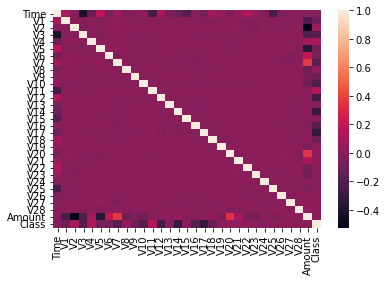

In [27]:
dataframe = pd.DataFrame(data)
dataframe
corr = dataframe.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [28]:
corr.tail(1)
vis_corr_from_class_to_others = corr.to_dict("index")["Class"]
vis_corr_from_class_to_others.pop('Class', None)#take out 'Class': 'V23' at end
vis_corr_from_class_to_others = dict( sorted(vis_corr_from_class_to_others.items(), key= lambda x: abs(x[1]),reverse=True))
vis_corr_from_class_to_others = pd.DataFrame.from_dict(vis_corr_from_class_to_others, orient="index")
vis_corr_from_class_to_others.head(15)


,0
V17,-0.313543
V14,-0.293452
V12,-0.250769
V10,-0.207120
V16,-0.187323
V3,-0.182915
V7,-0.176149
V11,0.149082
V4,0.129475
V18,-0.105355


In [29]:
#Julia: doing this visualization for report

#splitting data again now that it is SMOTED
legitimate = data[data.Class == 0]
fraudulent = data[data.Class == 1]

#table with means per class and their differences (maybe standardized by st dev), sort features by this in desc order
jvis_legit_means = legitimate.mean(axis=0)#gives per-column means
jvis_fraud_means = fraudulent.mean(axis=0)
jvis_std = data.std(axis=0)#these are series with feature names as keys
jvis_mean_diff_regularized = {}
for feature in jvis_legit_means.index:
  jvis_mean_diff_regularized[feature] = (jvis_legit_means[feature] - jvis_fraud_means[feature]) / jvis_std[feature]
  #print("Feature:", feature, " with mean diff ", jvis_legit_means[feature] - jvis_fraud_means[feature], " and standard dev ", jvis_std[feature])
jvis_mean_diff_regularized = dict( sorted(jvis_mean_diff_regularized.items(), key= lambda x: abs(x[1]),reverse=True))
#sorted by descending absolute value, standardized by standard deviation
jvis_mean_diff_regularized = pd.DataFrame.from_dict(jvis_mean_diff_regularized, orient="index")
jvis_mean_diff_regularized.head(15)

,0
Class,-24.511756
V17,7.685489
V14,7.193017
V12,6.146784
V10,5.076882
V16,4.591619
V3,4.483558
V7,4.317733
V11,-3.654269
V4,-3.173650


M2 starts here

In [30]:
from pandas.core.resample import f
#note: data variable is smoted data

#constructing lists of features to use
data.head()
#construct list of features in the two orders we will try for forward selection: PCA order and correlation with class order (decreasing corr)
print("We will use two orderings of features to do forward selection: the PCA component ordering, and the ordering of decreasing magnitude of correlation with the class label.")
features_pca_order = np.array(data.columns)
#take out 'Class' at the end
features_pca_order = features_pca_order[0:-1]
#move 'Time' to end, after PCA features
time_label = np.array([features_pca_order[0]])
features_pca_order = np.concatenate((features_pca_order[1:], time_label))
print("Features in PCA order: ", features_pca_order)
features_corr_order = vis_corr_from_class_to_others.to_dict()
features_corr_order = features_corr_order[0]
features_corr_order = np.array(list(features_corr_order))
print("Features in Correlation order: ", features_corr_order)
#print(len(features_corr_order), len(features_pca_order))#sanity check

We will use two orderings of features to do forward selection: the PCA component ordering, and the ordering of decreasing magnitude of correlation with the class label.
Features in PCA order:  ['V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12' 'V13'
 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24' 'V25'
 'V26' 'V27' 'V28' 'Amount' 'Time']
Features in Correlation order:  ['V17' 'V14' 'V12' 'V10' 'V16' 'V3' 'V7' 'V11' 'V4' 'V18' 'V1' 'V9' 'V5'
 'V2' 'V6' 'V19' 'V8' 'V21' 'V27' 'V20' 'Time' 'V28' 'V24' 'V23' 'Amount'
 'V22' 'V26' 'V13' 'V15' 'V25']


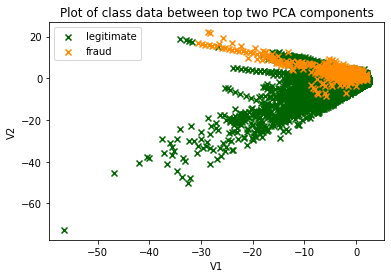

In [31]:
#basic visualization in 2d of classes, based on the first two dimensions of each
legitimate_color = 'darkgreen'#feel free to change these
fraud_color = 'darkorange'

#in PCA order
fig = plt.figure()
plt.title('Plot of class data between top two PCA components')
plt.xlabel(features_pca_order[0])
plt.ylabel(features_pca_order[1])
x_for_pca_2d_plot = data[features_pca_order[0]].to_numpy()
y_for_pca_2d_plot = data[features_pca_order[1]].to_numpy()
labels_for_2d_plot = data['Class'] #legitimate is 0, fraud is 1
x_legitimate_for_pca_2d_plot = x_for_pca_2d_plot[labels_for_2d_plot == 0]
y_legitimate_for_pca_2d_plot = y_for_pca_2d_plot[labels_for_2d_plot == 0]
x_fraud_for_pca_2d_plot = x_for_pca_2d_plot[labels_for_2d_plot == 1]
y_fraud_for_pca_2d_plot = y_for_pca_2d_plot[labels_for_2d_plot == 1]

#plot legitimate points
plt.scatter(x_legitimate_for_pca_2d_plot, y_legitimate_for_pca_2d_plot, color=legitimate_color, marker='x', label="legitimate")
#plot fraud points
plt.scatter(x_fraud_for_pca_2d_plot, y_fraud_for_pca_2d_plot, color=fraud_color, marker='x', label="fraud")
plt.legend()


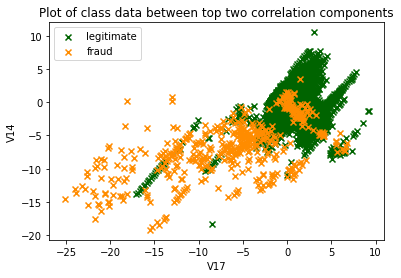

In [32]:
#in Correlation order
fig = plt.figure()
plt.title('Plot of class data between top two correlation components')
plt.xlabel(features_corr_order[0])
plt.ylabel(features_corr_order[1])
x_for_corr_2d_plot = data[features_corr_order[0]].to_numpy()
y_for_corr_2d_plot = data[features_corr_order[1]].to_numpy()
#labels_for_2d_plot = data['Class'] #legitimate is 0, fraud is 1
x_legitimate_for_corr_2d_plot = x_for_corr_2d_plot[labels_for_2d_plot == 0]
y_legitimate_for_corr_2d_plot = y_for_corr_2d_plot[labels_for_2d_plot == 0]
x_fraud_for_corr_2d_plot = x_for_corr_2d_plot[labels_for_2d_plot == 1]
y_fraud_for_corr_2d_plot = y_for_corr_2d_plot[labels_for_2d_plot == 1]

#plot legitimate points
plt.scatter(x_legitimate_for_corr_2d_plot, y_legitimate_for_corr_2d_plot, color=legitimate_color, marker='x', label="legitimate")
#plot fraud points
plt.scatter(x_fraud_for_corr_2d_plot, y_fraud_for_corr_2d_plot, color=fraud_color, marker='x', label="fraud")
plt.legend()

## Implementing Different Classification Algorithms (Naive Bayes, KNN, Logistic Regression)

In [33]:
#Naive Bayes
def performNaiveBayes(X_train, X_test, y_train, y_test): # returns accuracy and predicted y-values
    model = GaussianNB()
    model.fit(X_train, y_train)
    y_prediction = model.predict(X_test)
    n = y_test.size
    #accuracy = (y_test == y_prediction).sum() / n
    accuracy = accuracy_score(y_test, y_prediction)
    cross_entropy = log_loss(y_test, y_prediction)
    return accuracy, y_prediction, cross_entropy

#KNN Classfication, k = 5
def performKNN(X_train, X_test, y_train, y_test): # returns accuracy and predicted y-values
    model = KNeighborsClassifier()
    model.fit(X_train, y_train)
    y_prediction = model.predict(X_test)
    n = y_test.size
    accuracy = accuracy_score(y_test, y_prediction)
    cross_entropy = log_loss(y_test, y_prediction)
    return accuracy, y_prediction, cross_entropy

#To do Logistic Regression
def performLogisticRegression(X_train, X_test, y_train, y_test):
    model = LogisticRegression(solver='lbfgs', max_iter=3000)
    model.fit(X_train, y_train)
    y_prediction = model.predict(X_test)
    n = y_test.size
    accuracy = accuracy_score(y_test, y_prediction)
    cross_entropy = log_loss(y_test, y_prediction)
    return accuracy, y_prediction, cross_entropy


def doCrossValidation(X, y, model, kfolds=5):#can be generalized to many models
    #does cross validation to find average accuracy over given X, 
    #which has a number of features determined by findBestNumFeaturesNaiveBayes
    cv = KFold(n_splits=kfolds, random_state=1, shuffle=True)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv)
    #print(scores)
    avg_accuracy = np.average(np.array(scores))
    return avg_accuracy

def findBestNumFeaturesNaiveBayes(X_train, y_train, X_test, y_test, ordered_list_of_features, verbose=False):
    return findBestNumFeaturesGeneral('nb', X_train, y_train, X_test, y_test, ordered_list_of_features, verbose=verbose)
    
    
def findBestNumFeaturesGeneral(modelName, X_train, y_train, X_test, y_test, ordered_list_of_features, verbose=False, numFeatures=None):
    #returns test and cross validational accuracy arrays, 
    #each (D, 2) with the first column as number of features and the second column as accuracy
    total_num_features = len(ordered_list_of_features)
    if (numFeatures != None):
      total_num_features = numFeatures
    test_accuracies = np.zeros((total_num_features, 2))
    test_cross_entropies = np.zeros((total_num_features, 2))
    cv_accuracies = np.zeros((total_num_features, 2))
    for i in range(total_num_features):
        num_features = i + 1
        X_train_with_partial_features = X_train[ordered_list_of_features[0:num_features]]
        X_test_with_partial_features = X_test[ordered_list_of_features[0:num_features]]
        
        #do cross-validation (5-fold)
        if (modelName== 'nb'):
            model = GaussianNB()
        elif (modelName == 'knn'):
            model = KNeighborsClassifier()
        elif (modelName == 'lr'):
            model = LogisticRegression(solver='lbfgs', max_iter=3000)
        cv_accuracy = doCrossValidation(X_train_with_partial_features, y_train, model)
        if verbose:
            print("Cross validation accuracy with {} features: {}".format(num_features, cv_accuracy))
        cv_accuracies[i][0] = num_features
        cv_accuracies[i][1] = cv_accuracy

        #find test accuracy
        if (modelName== 'nb'):
            test_accuracy, trash, test_cross_entropy = performNaiveBayes(X_train_with_partial_features, X_test_with_partial_features, y_train, y_test)
        elif (modelName == 'knn'):
            test_accuracy, trash, test_cross_entropy = performKNN(X_train_with_partial_features, X_test_with_partial_features, y_train, y_test)
        elif (modelName == 'lr'):
            test_accuracy, trash, test_cross_entropy = performLogisticRegression(X_train_with_partial_features, X_test_with_partial_features, y_train, y_test)
        if verbose:
            print("Test accuracy with {} features: {}".format(num_features, test_accuracy))
        test_accuracies[i][0] = num_features
        test_accuracies[i][1] = test_accuracy
        test_cross_entropies[i][0] = num_features
        test_cross_entropies[i][1] = test_cross_entropy
    return test_accuracies, cv_accuracies, test_cross_entropies

def findBestNumFeaturesKNN(X_train, y_train, X_test, y_test, ordered_list_of_features, verbose = False, num_features = 5):
    #returns test and cross validational accuracy arrays, 
    #each (D, 2) with the first column as number of features and the second column as accuracy
    return findBestNumFeaturesGeneral('knn', X_train, y_train, X_test, y_test, ordered_list_of_features, verbose=verbose, numFeatures=num_features)
    '''test_accuracies = np.zeros((num_features, 2))
    cv_accuracies = np.zeros((num_features, 2))
    for i in range(num_features):
        num_features = i + 1
        X_train_with_partial_features = X_train[ordered_list_of_features[0:num_features]]
        X_test_with_partial_features = X_test[ordered_list_of_features[0:num_features]]
          
          #do cross-validation (5-fold)
        cv_accuracy = doCrossValidation(X_train_with_partial_features, y_train, KNeighborsClassifier())
        if verbose:
            print("Cross validation accuracy with {} features: {}".format(num_features, cv_accuracy))
        cv_accuracies[i][0] = num_features
        cv_accuracies[i][1] = cv_accuracy

          #find test accuracy
        test_accuracy, trash = performKNN(X_train_with_partial_features, X_test_with_partial_features, y_train, y_test)
        if verbose:
            print("Test accuracy with {} features: {}".format(num_features, test_accuracy))
        test_accuracies[i][0] = num_features
        test_accuracies[i][1] = test_accuracy
    return test_accuracies, cv_accuracies'''


def findBestNumFeaturesLR(X_train, y_train, X_test, y_test, ordered_list_of_features, verbose = False):
    #returns test and cross validational accuracy arrays, 
    #each (D, 2) with the first column as number of features and the second column as accuracy
    return findBestNumFeaturesGeneral('lr', X_train, y_train, X_test, y_test, ordered_list_of_features, verbose=verbose)

    '''total_num_features = len(ordered_list_of_features)
    test_accuracies = np.zeros((total_num_features, 2))
    cv_accuracies = np.zeros((total_num_features, 2))

    for i in range(total_num_features):
      num_features = i + 1
      X_train_with_partial_features = X_train[ordered_list_of_features[0:num_features]]
      X_test_with_partial_features = X_test[ordered_list_of_features[0:num_features]]

      #do cross-validation (5-fold)
      cv_accuracy = doCrossValidation(X_train_with_partial_features, y_train, LogisticRegression())
      if verbose:
          print("Cross validation accuracy with {} features: {}".format(num_features, cv_accuracy))
      cv_accuracies[i][0] = num_features
      cv_accuracies[i][1] = cv_accuracy

      #find test accuracy
      test_accuracy, trash = performLogisticRegression(X_train_with_partial_features, X_test_with_partial_features, y_train, y_test)
      if verbose:
          print("Test accuracy with {} features: {}".format(num_features, test_accuracy))
      test_accuracies[i][0] = num_features
      test_accuracies[i][1] = test_accuracy
    return test_accuracies, cv_accuracies'''


In [34]:
# Creating Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(data[features_pca_order], data['Class'], test_size=0.2)
print(X_train.shape)

(226974, 30)


### GNB Results

In [35]:
#using training set, perform cross-validation to see which number of features works best using forward selection on each list of features
print("Using PCA ordering for forward selection:")
GNB_test_accuracies_pca_ordering, GNB_cv_accuracies_pca_ordering, GNB_test_cross_entropies_pca_ordering = findBestNumFeaturesNaiveBayes(X_train, y_train, X_test, y_test, features_pca_order, verbose=True)
print("Using correlation ordering for forward selection:")
GNB_test_accuracies_corr_ordering, GNB_cv_accuracies_corr_ordering, GNB_test_cross_entropies_corr_ordering  = findBestNumFeaturesNaiveBayes(X_train, y_train, X_test, y_test, features_corr_order, verbose=True)


Using PCA ordering for forward selection:
Cross validation accuracy with 1 features: 0.9919021540194126
Test accuracy with 1 features: 0.9915938248977866
Cross validation accuracy with 2 features: 0.9860821040677619
Test accuracy with 2 features: 0.9856372479909771
Cross validation accuracy with 3 features: 0.9858441918211442
Test accuracy with 3 features: 0.985672494008177
Cross validation accuracy with 4 features: 0.9869720748729014
Test accuracy with 4 features: 0.9870294656703793
Cross validation accuracy with 5 features: 0.9854300479356466
Test accuracy with 5 features: 0.9852495418017764
Cross validation accuracy with 6 features: 0.9853463386642176
Test accuracy with 6 features: 0.9852495418017764
Cross validation accuracy with 7 features: 0.983610458069459
Test accuracy with 7 features: 0.9836106020019738
Cross validation accuracy with 8 features: 0.980015329549922
Test accuracy with 8 features: 0.9803327224023686
Cross validation accuracy with 9 features: 0.9798082581895109
Tes

In [36]:
best_GNB_accuracy = np.max(GNB_test_accuracies_corr_ordering[:, 1])
best_GNB_cross_entropy = np.min(GNB_test_cross_entropies_corr_ordering[:, 1])

Correlation order outperforms PCA order here in Naive Bayes
PCA has its highest test accuracy of 0.9915938248977866 when there are 1.0 features.
Correlation ordering has its highest test accuracy of 0.996228676159594 when there are 1.0 features.


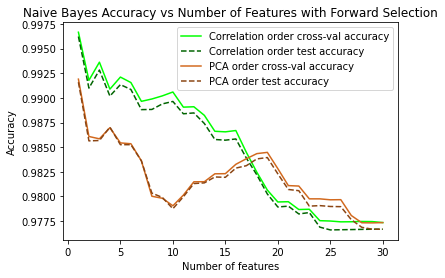

In [37]:
#plot accuracies over the number of features for each feature ordering
fig = plt.figure()
plt.title('Naive Bayes Accuracy vs Number of Features with Forward Selection')
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
x_for_accuracy_plot = GNB_test_accuracies_pca_ordering[:, 0]
y_corr_cv_for_accuracy_plot = GNB_cv_accuracies_corr_ordering[:, 1]
y_corr_test_for_accuracy_plot = GNB_test_accuracies_corr_ordering[:, 1]
y_pca_cv_for_accuracy_plot = GNB_cv_accuracies_pca_ordering[:, 1]
y_pca_test_for_accuracy_plot = GNB_test_accuracies_pca_ordering[:, 1]

plt.plot(x_for_accuracy_plot, y_corr_cv_for_accuracy_plot, color='lime', label="Correlation order cross-val accuracy")
plt.plot(x_for_accuracy_plot, y_corr_test_for_accuracy_plot, color='darkgreen', linestyle='dashed', label="Correlation order test accuracy")
plt.plot(x_for_accuracy_plot, y_pca_cv_for_accuracy_plot, color='chocolate', label="PCA order cross-val accuracy")
plt.plot(x_for_accuracy_plot, y_pca_test_for_accuracy_plot, color='saddlebrown', linestyle='dashed', label="PCA order test accuracy")

print("Correlation order outperforms PCA order here in Naive Bayes")

plt.legend()
#find one with best test accuracy
#pca ordering
max_index_for_test_accuracy_pca_ngb = np.argmax(GNB_test_accuracies_pca_ordering[:, 1])
print("PCA has its highest test accuracy of {} when there are {} features.".format(GNB_test_accuracies_pca_ordering[max_index_for_test_accuracy_pca_ngb][1], GNB_test_accuracies_pca_ordering[max_index_for_test_accuracy_pca_ngb][0]))
#corr ordering
max_index_for_test_accuracy_corr_ngb = np.argmax(GNB_test_accuracies_corr_ordering[:, 1])
print("Correlation ordering has its highest test accuracy of {} when there are {} features.".format(GNB_test_accuracies_corr_ordering[max_index_for_test_accuracy_corr_ngb][1], GNB_test_accuracies_corr_ordering[max_index_for_test_accuracy_corr_ngb][0]))

We want to minimize cross entropy
PCA has its lowest test cross_entropy of 0.29034470917333427 when there are 1.0 features.
Correlation ordering has its lowest test cross_entropy of 0.13025950363806038 when there are 1.0 features.


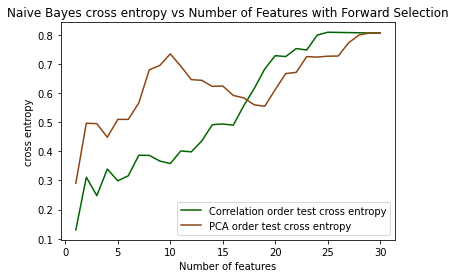

In [38]:
def plot_cross_entropies(test_cross_entropies_pca_ordering, test_cross_entropies_corr_ordering, modelName):
    #plot cross_entropies over the number of features for each feature ordering
    print("We want to minimize cross entropy")
    fig = plt.figure()
    plt.title('{} cross entropy vs Number of Features with Forward Selection'.format(modelName))
    plt.xlabel("Number of features")
    plt.ylabel("cross entropy")
    x_for_cross_entropy_plot = test_cross_entropies_pca_ordering[:, 0]
    #y_corr_cv_for_cross_entropy_plot = cv_cross_entropies_corr_ordering[:, 1]
    y_corr_test_for_cross_entropy_plot = test_cross_entropies_corr_ordering[:, 1]
    #y_pca_cv_for_cross_entropy_plot = cv_cross_entropies_pca_ordering[:, 1]
    y_pca_test_for_cross_entropy_plot = test_cross_entropies_pca_ordering[:, 1]

    #plt.plot(x_for_cross_entropy_plot, y_corr_cv_for_cross_entropy_plot, color='lime', label="Correlation order cross-val cross_entropy")
    plt.plot(x_for_cross_entropy_plot, y_corr_test_for_cross_entropy_plot, color='darkgreen', label="Correlation order test cross entropy")
    #plt.plot(x_for_cross_entropy_plot, y_pca_cv_for_cross_entropy_plot, color='chocolate', label="PCA order cross-val cross_entropy")
    plt.plot(x_for_cross_entropy_plot, y_pca_test_for_cross_entropy_plot, color='saddlebrown', label="PCA order test cross entropy")

    plt.legend()
    #find one with best test cross_entropy
    #pca ordering
    min_index_for_test_cross_entropy_pca_ngb = np.argmin(test_cross_entropies_pca_ordering[:, 1])
    print("PCA has its lowest test cross_entropy of {} when there are {} features.".format(test_cross_entropies_pca_ordering[min_index_for_test_cross_entropy_pca_ngb][1], test_cross_entropies_pca_ordering[min_index_for_test_cross_entropy_pca_ngb][0]))
    #corr ordering
    min_index_for_test_cross_entropy_corr_ngb = np.argmin(test_cross_entropies_corr_ordering[:, 1])
    print("Correlation ordering has its lowest test cross_entropy of {} when there are {} features.".format(test_cross_entropies_corr_ordering[min_index_for_test_cross_entropy_corr_ngb][1], test_cross_entropies_corr_ordering[min_index_for_test_cross_entropy_corr_ngb][0]))
plot_cross_entropies(GNB_test_cross_entropies_pca_ordering, GNB_test_cross_entropies_corr_ordering, "Naive Bayes")

 - The test and cross-validational scores for each ordering line up well, which is good.
 - Correlation ordering outperforms PCA ordering here with Naive Bayes.

### KNN Results

In [39]:
print("Using PCA ordering for forward selection:")
KNN_test_accuracies_pca_ordering, KNN_cv_accuracies_pca_ordering, KNN_test_cross_entropies_pca_ordering  = findBestNumFeaturesKNN(X_train, y_train, X_test, y_test, features_pca_order, verbose=True, num_features= 9)
print("Using correlation ordering for forward selection:")
KNN_test_accuracies_corr_ordering, KNN_cv_accuracies_corr_ordering, KNN_test_cross_entropies_corr_ordering  = findBestNumFeaturesKNN(X_train, y_train, X_test, y_test, features_corr_order, verbose=True, num_features = 9)



Using PCA ordering for forward selection:
Cross validation accuracy with 1 features: 0.9982993648983335
Test accuracy with 1 features: 0.9984315522345975
Cross validation accuracy with 2 features: 0.9984711904744838
Test accuracy with 2 features: 0.9986606513463978
Cross validation accuracy with 3 features: 0.9986958859887569
Test accuracy with 3 features: 0.9987311433807979
Cross validation accuracy with 4 features: 0.9989249874687033
Test accuracy with 4 features: 0.9990483575355985
Cross validation accuracy with 5 features: 0.9990747839929373
Test accuracy with 5 features: 0.9991012265613985
Cross validation accuracy with 6 features: 0.9991012192046392
Test accuracy with 6 features: 0.9992245876215987
Cross validation accuracy with 7 features: 0.9992113643671642
Test accuracy with 7 features: 0.9992950796559988
Cross validation accuracy with 8 features: 0.9991761178064531
Test accuracy with 8 features: 0.9992950796559988
Cross validation accuracy with 9 features: 0.9992554219857153


In [40]:
best_KNN_accuracy = np.max(KNN_test_accuracies_corr_ordering[:, 1])
best_KNN_cross_entropy = np.min(KNN_test_cross_entropies_corr_ordering[:,1])

Correlation order outperforms PCA order when the number of features is small. As the number of features increases, the two orders achieve roughly the same performance.
PCA has its highest test accuracy of 0.999347948681799 when there are 9.0 features.
Correlation ordering has its highest test accuracy of 0.9995594247849993 when there are 7.0 features.


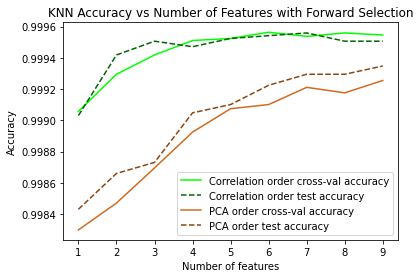

In [41]:
#plot accuracies over the number of features for each feature ordering
fig = plt.figure()
plt.title('KNN Accuracy vs Number of Features with Forward Selection')
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
x_for_accuracy_plot = KNN_test_accuracies_pca_ordering[:,0]
y_corr_cv_for_accuracy_plot = KNN_cv_accuracies_corr_ordering[:, 1]
y_corr_test_for_accuracy_plot = KNN_test_accuracies_corr_ordering[:, 1]
y_pca_cv_for_accuracy_plot = KNN_cv_accuracies_pca_ordering[:, 1]
y_pca_test_for_accuracy_plot = KNN_test_accuracies_pca_ordering[:, 1]

plt.plot(x_for_accuracy_plot, y_corr_cv_for_accuracy_plot, color='lime', label="Correlation order cross-val accuracy")
plt.plot(x_for_accuracy_plot, y_corr_test_for_accuracy_plot, color='darkgreen', linestyle='dashed', label="Correlation order test accuracy")
plt.plot(x_for_accuracy_plot, y_pca_cv_for_accuracy_plot, color='chocolate', label="PCA order cross-val accuracy")
plt.plot(x_for_accuracy_plot, y_pca_test_for_accuracy_plot, color='saddlebrown', linestyle='dashed', label="PCA order test accuracy")
plt.xticks(np.arange(min(x_for_accuracy_plot), max(x_for_accuracy_plot)+1, 1))
print("Correlation order outperforms PCA order when the number of features is small. As the number of features increases, the two orders achieve roughly the same performance.")

plt.legend()
#find one with best test accuracy
#pca ordering
max_index_for_test_accuracy_pca_ngb = np.argmax(KNN_test_accuracies_pca_ordering[:, 1])
print("PCA has its highest test accuracy of {} when there are {} features.".format(KNN_test_accuracies_pca_ordering[max_index_for_test_accuracy_pca_ngb][1], KNN_test_accuracies_pca_ordering[max_index_for_test_accuracy_pca_ngb][0]))
#corr ordering
max_index_for_test_accuracy_corr_ngb = np.argmax(KNN_test_accuracies_corr_ordering[:, 1])
print("Correlation ordering has its highest test accuracy of {} when there are {} features.".format(KNN_test_accuracies_corr_ordering[max_index_for_test_accuracy_corr_ngb][1], KNN_test_accuracies_corr_ordering[max_index_for_test_accuracy_corr_ngb][0]))

We want to minimize cross entropy
PCA has its lowest test cross_entropy of 0.02252111104260314 when there are 9.0 features.
Correlation ordering has its lowest test cross_entropy of 0.015217027475236764 when there are 7.0 features.


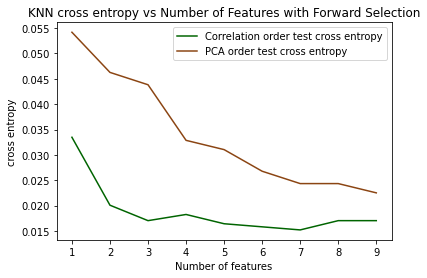

In [42]:
plot_cross_entropies(KNN_test_cross_entropies_pca_ordering, KNN_test_cross_entropies_corr_ordering, "KNN")

### Logistic Regression

In [43]:
#using training set, perform cross-validation to see which number of features works best using forward selection on each list of features
print("Using PCA ordering for forward selection:")
LR_test_accuracies_pca_ordering, LR_cv_accuracies_pca_ordering, LR_test_cross_entropies_pca_ordering = findBestNumFeaturesLR(X_train, y_train, X_test, y_test, features_pca_order, verbose=True)
print("Using correlation ordering for forward selection:")
LR_test_accuracies_corr_ordering, LR_cv_accuracies_corr_ordering, LR_test_cross_entropies_corr_ordering = findBestNumFeaturesLR(X_train, y_train, X_test, y_test, features_corr_order, verbose=True)



Using PCA ordering for forward selection:
Cross validation accuracy with 1 features: 0.9982024375357723
Test accuracy with 1 features: 0.9983434371915973
Cross validation accuracy with 2 features: 0.9983522345452875
Test accuracy with 2 features: 0.9985901593119978
Cross validation accuracy with 3 features: 0.9984359443990541
Test accuracy with 3 features: 0.9986077823205978
Cross validation accuracy with 4 features: 0.9986826687711311
Test accuracy with 4 features: 0.9989249964753982
Cross validation accuracy with 5 features: 0.9986826687711309
Test accuracy with 5 features: 0.9989602424925983
Cross validation accuracy with 6 features: 0.9987223209092901
Test accuracy with 6 features: 0.9989602424925983
Cross validation accuracy with 7 features: 0.9987487557327672
Test accuracy with 7 features: 0.9989778655011984
Cross validation accuracy with 8 features: 0.998748755635711
Test accuracy with 8 features: 0.9989954885097984
Cross validation accuracy with 9 features: 0.9987707847846833
T

In [44]:
best_LR_accuracy = np.max(LR_test_accuracies_corr_ordering[:,1])
best_LR_cross_entropy = np.min(LR_test_cross_entropies_corr_ordering[:,1])

PCA has its highest test accuracy of 0.9992950796559988 when there are 16.0 features.
Correlation ordering has its highest test accuracy of 0.9993127026645989 when there are 9.0 features.


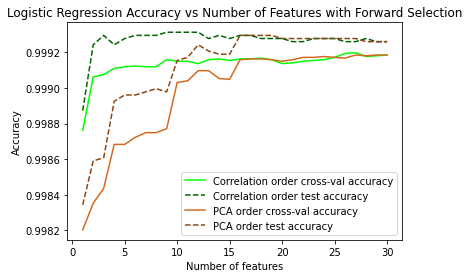

In [45]:
#plot accuracies over the number of features for each feature ordering
fig = plt.figure()
plt.title('Logistic Regression Accuracy vs Number of Features with Forward Selection')
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
x_for_accuracy_plot = LR_test_accuracies_pca_ordering[:,0]
y_corr_cv_for_accuracy_plot = LR_cv_accuracies_corr_ordering[:, 1]
y_corr_test_for_accuracy_plot = LR_test_accuracies_corr_ordering[:, 1]
y_pca_cv_for_accuracy_plot = LR_cv_accuracies_pca_ordering[:, 1]
y_pca_test_for_accuracy_plot = LR_test_accuracies_pca_ordering[:, 1]

plt.plot(x_for_accuracy_plot, y_corr_cv_for_accuracy_plot, color='lime', label="Correlation order cross-val accuracy")
plt.plot(x_for_accuracy_plot, y_corr_test_for_accuracy_plot, color='darkgreen', linestyle='dashed', label="Correlation order test accuracy")
plt.plot(x_for_accuracy_plot, y_pca_cv_for_accuracy_plot, color='chocolate', label="PCA order cross-val accuracy")
plt.plot(x_for_accuracy_plot, y_pca_test_for_accuracy_plot, color='saddlebrown', linestyle='dashed', label="PCA order test accuracy")

plt.legend()
#find one with best test accuracy
#pca ordering
max_index_for_test_accuracy_pca_ngb = np.argmax(LR_test_accuracies_pca_ordering[:, 1])
print("PCA has its highest test accuracy of {} when there are {} features.".format(LR_test_accuracies_pca_ordering[max_index_for_test_accuracy_pca_ngb][1], LR_test_accuracies_pca_ordering[max_index_for_test_accuracy_pca_ngb][0]))
#corr ordering
max_index_for_test_accuracy_corr_ngb = np.argmax(LR_test_accuracies_corr_ordering[:, 1])
print("Correlation ordering has its highest test accuracy of {} when there are {} features.".format(LR_test_accuracies_corr_ordering[max_index_for_test_accuracy_corr_ngb][1], LR_test_accuracies_corr_ordering[max_index_for_test_accuracy_corr_ngb][0]))

We want to minimize cross entropy
PCA has its lowest test cross_entropy of 0.024347198868178578 when there are 16.0 features.
Correlation ordering has its lowest test cross_entropy of 0.023738521714736616 when there are 9.0 features.


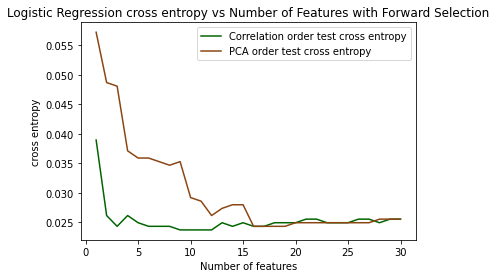

In [46]:
plot_cross_entropies(LR_test_cross_entropies_pca_ordering, LR_test_cross_entropies_corr_ordering, "Logistic Regression")

### Additional Visualization

In [47]:
'''#could plot test values in 2d for visualization, show true positive, false positive, etc:
X_train_corr_with_partial_features = X_train[features_corr_order[0:2]]
X_train_pca_with_partial_features = X_train[features_pca_order[0:2]]
X_test_corr_with_partial_features = X_test[features_corr_order[0:2]]
X_test_pca_with_partial_features = X_test[features_pca_order[0:2]]
test_accuracy_corr_2d, y_pred_corr = performNaiveBayes(X_train_corr_with_partial_features, X_test_corr_with_partial_features, y_train, y_test)
test_accuracy_pca_2d, y_pred_pca = performNaiveBayes(X_train_corr_with_partial_features, X_test_corr_with_partial_features, y_train, y_test)

#class = 1 is positive
corr_true_positives = []
corr_true_positives_x1 = np.ma.masked_where(((y_test==0)|(y_pred_corr==0)), X_test_corr_with_partial_features[:, 0])
print(corr_true_positives_x1)
corr_false_positives = X

#also confusion matrix'''
#this is staying as an extra goal for now, masking is weird

'#could plot test values in 2d for visualization, show true positive, false positive, etc:\nX_train_corr_with_partial_features = X_train[features_corr_order[0:2]]\nX_train_pca_with_partial_features = X_train[features_pca_order[0:2]]\nX_test_corr_with_partial_features = X_test[features_corr_order[0:2]]\nX_test_pca_with_partial_features = X_test[features_pca_order[0:2]]\ntest_accuracy_corr_2d, y_pred_corr = performNaiveBayes(X_train_corr_with_partial_features, X_test_corr_with_partial_features, y_train, y_test)\ntest_accuracy_pca_2d, y_pred_pca = performNaiveBayes(X_train_corr_with_partial_features, X_test_corr_with_partial_features, y_train, y_test)\n\n#class = 1 is positive\ncorr_true_positives = []\ncorr_true_positives_x1 = np.ma.masked_where(((y_test==0)|(y_pred_corr==0)), X_test_corr_with_partial_features[:, 0])\nprint(corr_true_positives_x1)\ncorr_false_positives = X\n\n#also confusion matrix'

## To-do extensions:
- KNN
- Logistic Regression

## Potential extensions
- Doing cross entropy in addition to accuracy
- Visualizing confusion matrices
- compare performance with and without SMOTE

In [48]:
#not sure why this was here so I commented it out - Julia
#print("Using PCA ordering for forward selection:")
#KNN_test_accuracies_pca_ordering, KNN_cv_accuracies_pca_ordering, KNN_test_cross_entropies_pca_ordering  = findBestNumFeaturesKNN(X_train, y_train, X_test, y_test, features_pca_order, verbose=True, num_features= 7)
#print("Using correlation ordering for forward selection:")
#KNN_test_accuracies_corr_ordering, KNN_cv_accuracies_corr_ordering, KNN_test_cross_entropies_corr_ordering  = findBestNumFeaturesKNN(X_train, y_train, X_test, y_test, features_corr_order, verbose=True, num_features = 7)

M3 Starts Here

In [49]:
from sklearn.metrics import confusion_matrix

# Data Preprocessing Extension

In [52]:
print(data.shape)
pre_smote_data = data
print(pre_smote_data.shape)

# Randomly retain only 5% of legitimate dataset
legitimate_presmote = pre_smote_data[pre_smote_data.Class == 0]
fraudulent_presmote = pre_smote_data[pre_smote_data.Class == 1]
legitimate_presmote = legitimate_presmote.sample(legitimate_presmote.shape[0] // 20)
print(legitimate_presmote.shape)

slim_presmote = legitimate_presmote.append(fraudulent_presmote)
print(slim_presmote.shape)

#slim_postsmote = perform_smote(slim_presmote)
print(slim_postsmote.shape)

X_train_slim, X_test_slim, y_train_slim, y_test_slim = train_test_split(slim_postsmote[features_pca_order], slim_postsmote['Class'], test_size=0.2)

(283718, 31)
(283718, 31)
(14162, 31)
(14635, 31)
(28324, 31)


# Neural Nets
Since we have n >> d, that is, much more data than features, and our features are *not* pixels in an image or time-series data, we decided to use fully connected feed forward neural nets, and try different architectures (numbers of layers, which we call depth, and numbers of neurons in each layer, which we call width) to see how high the accuracy can become.

It is conventional to have hidden layers that are either all the same width or that decrease in width as we approach the output neuron. Furthermore, typical layer widths that we have encountered are at most either the number of input neurons (neurons_in) or the average of the number of input neurons and the number of output neurons(neurons_out). 

Let $w1 = neurons_in$, and $w2 = \frac{neurons\_ in + neurons\_ out}{2}$.
We will train models with different depths based on the different above maximal widths. We will denote a model's architecture as: 

\<input layer\> - ( \<hidden layer 1\> - \<hidden layer 2\> ... ) - \<output layer\>

Since this is binary classification, we planned to use a single output node with a sigmoid activation function. However, due to difficulties formatting the data that led to an error of encountering a loss that was constantly 0, we switched to using a one-hot encoding and an output layer with two nodes, each with a softmax activation function. Since this method is used for multiclass classification, it is also an option to use for binary classification. For the hidden layers, we used the 'relu' activation function, since it is the most conventional. We then trained the data over 50 epochs for each model, and created a plot of the resulting test accuracies.



In [54]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.losses import CategoricalCrossentropy

In [55]:
#data preprocessing for neural nets
X_train_nn = X_train[features_corr_order].values.astype('float')
X_test_nn = X_test[features_corr_order].values.astype('float')
Y_train_nn = y_train.values.astype('float')
Y_test_nn = y_test.values.astype('float')
class_column_name='Class'
Y = data[class_column_name].values.astype('float')
encoder = LabelEncoder()
encoder.fit(Y)
Y_train_nn = encoder.transform(Y_train_nn)
Y_train_nn = np_utils.to_categorical(Y_train_nn)
Y_test_nn = encoder.transform(Y_test_nn)
Y_test_nn = np_utils.to_categorical(Y_test_nn)

epochs = 50#for real training
#epochs = 3#for debugging, comment out

def buildNNAndDoTestAccuracy(model, X_train, X_test, y_train, y_test, epochs=epochs, batch_size=50):
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)#simpler way
    # evaluate the keras model
    _, accuracy = model.evaluate(X_test, y_test)
    print('Accuracy: %.4f' % (accuracy))
    y_pred = model.predict(X_test)
    cce = CategoricalCrossentropy()
    cross_entropy = cce(y_test, y_pred).numpy()
    print('Cross entropy:%.4f' % (cross_entropy))
    return accuracy, cross_entropy

In [56]:
(NaN, neurons_in) = X_train_nn.shape
print("Input neurons: ", neurons_in)
print("Output neurons: 1")
w1 = neurons_in
w2 = int((neurons_in + 2)/2)
print("w1: ", w1)
print("w2: ", w2)

Input neurons:  30
Output neurons: 1
w1:  30
w2:  16


In [57]:
model1_str = "30-(30)-2"
def baseline_model1():
    #Use the Dense class for fully connected layers
    #create model
    model1 = Sequential()
    model1.add(Dense(w1, input_dim=w1, activation='relu'))#first hidden layer
    model1.add(Dense(2, activation='softmax'))
    #compile model
    model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    #adam optimizer is an efficient stochastic gradient descent
    return model1

model2_str = "30-(30-30)-2"
def baseline_model2():
    #Use the Dense class for fully connected layers
    #create model
    model = Sequential()
    model.add(Dense(w1, input_dim=w1, activation='relu'))#first hidden layer
    model.add(Dense(w1, activation='relu'))#second hidden layer
    model.add(Dense(2, activation='softmax'))
    #compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    #adam optimizer is an efficient stochastic gradient descent
    return model

model3_str = "30-(30-30-30)-2"
def baseline_model3():
    #Use the Dense class for fully connected layers
    #create model
    model = Sequential()
    model.add(Dense(w1, input_dim=w1, activation='relu'))#first hidden layer
    model.add(Dense(w1, activation='relu'))#second hidden layer
    model.add(Dense(w1, activation='relu'))#third hidden layer
    model.add(Dense(2, activation='softmax'))    #compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    #adam optimizer is an efficient stochastic gradient descent
    return model

model4_str = "30-(30-15)-2"
def baseline_model4():
    #Use the Dense class for fully connected layers
    #create model
    model = Sequential()
    model.add(Dense(w1, input_dim=w1, activation='relu'))#first hidden layer
    model.add(Dense(15, activation='relu'))#second hidden layer
    model.add(Dense(2, activation='softmax'))
    #compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    #adam optimizer is an efficient stochastic gradient descent
    return model

model5_str = "30-(30-20-10)-2"
def baseline_model5():
    #Use the Dense class for fully connected layers
    #create model
    model = Sequential()
    model.add(Dense(w1, input_dim=w1, activation='relu'))#first hidden layer
    model.add(Dense(20, activation='relu'))#second hidden layer
    model.add(Dense(10, activation='relu'))#third hidden layer
    model.add(Dense(2, activation='softmax'))
    #compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    #adam optimizer is an efficient stochastic gradient descent
    return model

model6_str = "30-(16)-2"
def baseline_model6():
    #Use the Dense class for fully connected layers
    #create model
    model = Sequential()
    model.add(Dense(w2, input_dim=w1, activation='relu'))#first hidden layer
    model.add(Dense(2, activation='softmax'))
    #compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    #adam optimizer is an efficient stochastic gradient descent
    return model

model7_str = "30-(16-16)-2"
def baseline_model7():
    #Use the Dense class for fully connected layers
    #create model
    model = Sequential()
    model.add(Dense(w2, input_dim=w1, activation='relu'))#first hidden layer
    model.add(Dense(w2, activation='relu'))#second hidden layer
    model.add(Dense(2, activation='softmax'))
    #compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    #adam optimizer is an efficient stochastic gradient descent
    return model

model8_str = "30-(16-16-16)-2"
def baseline_model8():
    #Use the Dense class for fully connected layers
    #create model
    model = Sequential()
    model.add(Dense(w2, input_dim=w1, activation='relu'))#first hidden layer
    model.add(Dense(w2, activation='relu'))#second hidden layer
    model.add(Dense(w2, activation='relu'))#third hidden layer
    model.add(Dense(2, activation='softmax'))
    #compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    #adam optimizer is an efficient stochastic gradient descent
    return model

model9_str = "30-(16-9)-2"
def baseline_model9():
    #Use the Dense class for fully connected layers
    #create model
    model = Sequential()
    model.add(Dense(w2, input_dim=w1, activation='relu'))#first hidden layer
    model.add(Dense(9, activation='relu'))#second hidden layer
    model.add(Dense(2, activation='softmax'))
    #compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    #adam optimizer is an efficient stochastic gradient descent
    return model

model10_str = "30-(16-10-5)-2"
def baseline_model10():
    #Use the Dense class for fully connected layers
    #create model
    model = Sequential()
    model.add(Dense(w2, input_dim=w1, activation='relu'))#first hidden layer
    model.add(Dense(10, activation='relu'))#second hidden layer
    model.add(Dense(5, activation='relu'))#third hidden layer
    model.add(Dense(2, activation='softmax'))
    #compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    #adam optimizer is an efficient stochastic gradient descent
    return model


In [58]:
train_models = True
model_strs = np.array([model1_str, model2_str, model3_str, model4_str, model5_str, model6_str, model7_str, model8_str, model9_str, model10_str])
print("Strings representing models' architectures: ")
for i in range(len(model_strs)):
    print("\tModel {}: {}".format(i + 1, model_strs[i]))
if train_models:
    print("\nModel 1:")
    model1_accuracy, model1_cross_entropy = buildNNAndDoTestAccuracy(baseline_model1(), X_train_nn, X_test_nn, Y_train_nn, Y_test_nn)
    print("\nModel 2:")
    model2_accuracy, model2_cross_entropy = buildNNAndDoTestAccuracy(baseline_model2(), X_train_nn, X_test_nn, Y_train_nn, Y_test_nn)
    print("\nModel 3:")
    model3_accuracy, model3_cross_entropy = buildNNAndDoTestAccuracy(baseline_model3(), X_train_nn, X_test_nn, Y_train_nn, Y_test_nn)
    print("\nModel 4:")
    model4_accuracy, model4_cross_entropy = buildNNAndDoTestAccuracy(baseline_model4(), X_train_nn, X_test_nn, Y_train_nn, Y_test_nn)
    print("\nModel 5:")
    model5_accuracy, model5_cross_entropy = buildNNAndDoTestAccuracy(baseline_model5(), X_train_nn, X_test_nn, Y_train_nn, Y_test_nn)
    print("\nModel 6:")
    model6_accuracy, model6_cross_entropy = buildNNAndDoTestAccuracy(baseline_model6(), X_train_nn, X_test_nn, Y_train_nn, Y_test_nn)
    print("\nModel 7:")
    model7_accuracy, model7_cross_entropy = buildNNAndDoTestAccuracy(baseline_model7(), X_train_nn, X_test_nn, Y_train_nn, Y_test_nn)
    print("\nModel 8:")
    model8_accuracy, model8_cross_entropy = buildNNAndDoTestAccuracy(baseline_model8(), X_train_nn, X_test_nn, Y_train_nn, Y_test_nn)
    print("\nModel 9:")
    model9_accuracy, model9_cross_entropy = buildNNAndDoTestAccuracy(baseline_model9(), X_train_nn, X_test_nn, Y_train_nn, Y_test_nn)
    print("\nModel 10:")
    model10_accuracy, model10_cross_entropy = buildNNAndDoTestAccuracy(baseline_model10(), X_train_nn, X_test_nn, Y_train_nn, Y_test_nn)
    #accuracies
    model_accuracies = np.array([model1_accuracy, model2_accuracy, model3_accuracy, model4_accuracy, model5_accuracy, model6_accuracy, model7_accuracy, model8_accuracy, model9_accuracy, model10_accuracy])
    print("Model test accuracies: ", model_accuracies)
    #cross entropies
    model_cross_entropies = np.array([model1_cross_entropy, model2_cross_entropy, model3_cross_entropy, model4_cross_entropy, model5_cross_entropy, model6_cross_entropy, model7_cross_entropy, model8_cross_entropy, model9_cross_entropy, model10_cross_entropy])
    print("Model test cross_entropies: ", model_cross_entropies)
else:
    #so don't have to retrain, save accuracies from last run
    model_accuracies = np.array(
        [0.99947131, 0.99943608, 0.99948895, 0.99929506, 0.99915409, 0.99936557,
 0.99943608, 0.9993127,  0.99940079, 0.99952418])
    #this^^ is from second time running all epochs, and generating cross entropies (agrees with cross entropies below)
    
    print("Model test accuracies: ", model_accuracies)
    model_cross_entropies = np.array([0.00358221, 0.00471363, 0.00511162, 0.00495011, 0.00538419, 0.00326659,
 0.00405101, 0.00501738, 0.003371,   0.00293083])
    print("Model test cross_entropies: ", model_cross_entropies)

best_NN_accuracy = np.max(model_accuracies)
best_NN_cross_entropy = np.min(model_cross_entropies)



Strings representing models' architectures: 
	Model 1: 30-(30)-2
	Model 2: 30-(30-30)-2
	Model 3: 30-(30-30-30)-2
	Model 4: 30-(30-15)-2
	Model 5: 30-(30-20-10)-2
	Model 6: 30-(16)-2
	Model 7: 30-(16-16)-2
	Model 8: 30-(16-16-16)-2
	Model 9: 30-(16-9)-2
	Model 10: 30-(16-10-5)-2

Model 1:
Epoch 1/50
4540/4540 [==============================] - 10s 2ms/step - loss: 0.0086 - accuracy: 0.9985
Epoch 2/50
4540/4540 [==============================] - 9s 2ms/step - loss: 0.0037 - accuracy: 0.9994
Epoch 3/50
4540/4540 [==============================] - 9s 2ms/step - loss: 0.0032 - accuracy: 0.9994
Epoch 4/50
4540/4540 [==============================] - 9s 2ms/step - loss: 0.0030 - accuracy: 0.9994
Epoch 5/50
4540/4540 [==============================] - 12s 3ms/step - loss: 0.0029 - accuracy: 0.9994
Epoch 6/50
4540/4540 [==============================] - 9s 2ms/step - loss: 0.0026 - accuracy: 0.9995
Epoch 7/50
4540/4540 [==============================] - 9s 2ms/step - loss: 0.0026 - accuracy: 0

Test accuracies for each model:
Each Neural Network has 30 input nodes, 2 output nodes, and the assortment of hidden layers described below.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


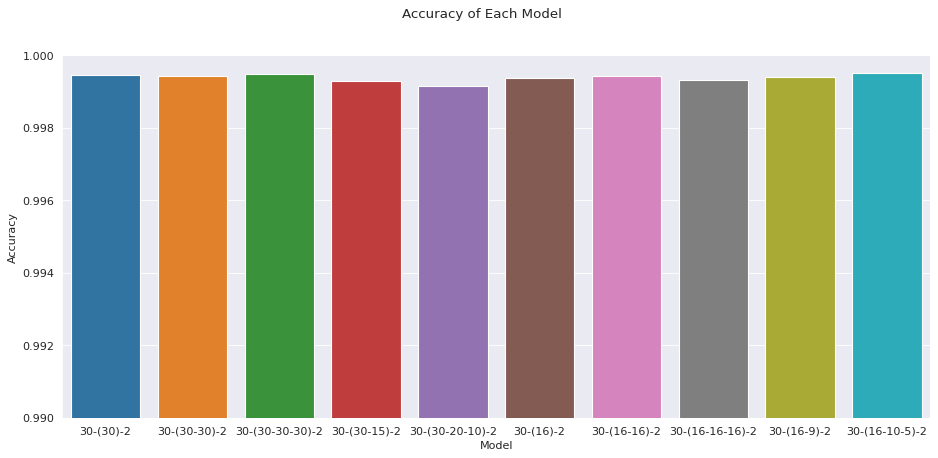

In [59]:
print("Test accuracies for each model:")
print("Each Neural Network has 30 input nodes, 2 output nodes, and the assortment of hidden layers described below.")
plt.figure(figsize=(14, 6), dpi=80)
sns.set_style('darkgrid')
sns.barplot(model_strs, model_accuracies)
plt.ylim(0.99, 1)
plt.suptitle("Accuracy of Each Model")
plt.ylabel("Accuracy")
plt.xlabel("Model")
# We change the fontsize of ticks label 
plt.tick_params(axis='x', labelsize=10)


Test cross entropies for each model:
Each Neural Network has 30 input nodes, 2 output nodes, and the assortment of hidden layers described below.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


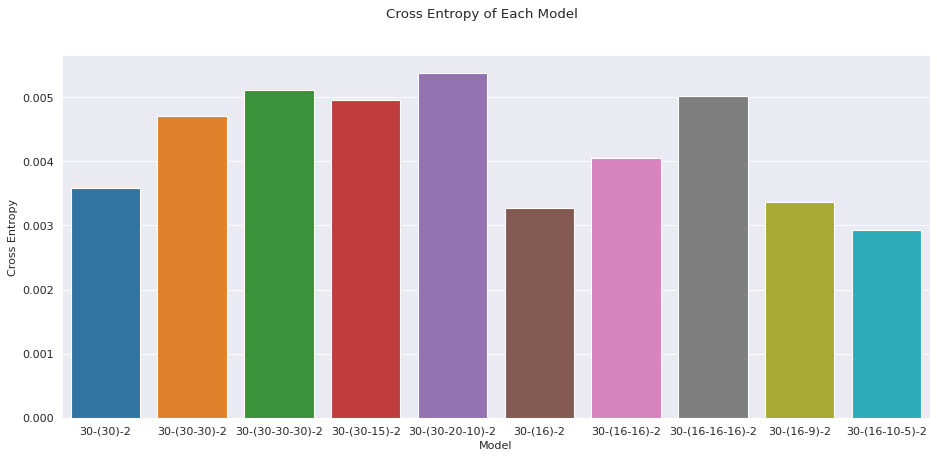

In [60]:
#cross entropy plot
print("Test cross entropies for each model:")
print("Each Neural Network has 30 input nodes, 2 output nodes, and the assortment of hidden layers described below.")
plt.figure(figsize=(14, 6), dpi=80)
sns.set_style('darkgrid')
sns.barplot(model_strs, model_cross_entropies)
plt.suptitle("Cross Entropy of Each Model")
plt.ylabel("Cross Entropy")
plt.xlabel("Model")
# We change the fontsize of ticks label 
plt.tick_params(axis='x', labelsize=10)

Confusion Matrix - NN

In [61]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

#Label = ['Legitimate', 'Fradulent']
#conf_matrix = confusion_matrix(Y_test_nn, y_pred)
#plt.figure(figsize = (7,7))
#sns.heatmap(conf_matrix, xticklabels=Label, yticklabels=Label, annot = True, fmt ="d");

#plt.title("NN Confusion matrix")
#plt.ylabel("True")
#plt.xlabel("Predicted")
#plt.show()

# Random Forest

In [62]:
X = data.drop(['Class'], axis=1)
Y = data['Class']
X_data = X.values
y_data = Y.values
print(X.shape)
print(Y.shape)

(283718, 30)
(283718,)


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state=40, test_size=0.3)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [64]:
y_predicted = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_predicted)
cross_entropy = log_loss(y_test, y_predicted)

In [65]:
accuracy

0.9996005451383994

In [66]:
# looking at all the parameters

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84991
           1       0.93      0.79      0.85       125

    accuracy                           1.00     85116
   macro avg       0.96      0.90      0.93     85116
weighted avg       1.00      1.00      1.00     85116



In [67]:
best_RF_accuracy = accuracy
best_RF_cross_entropy = cross_entropy
#best_RF_accuracy = 0
#best_RF_cross_entropy = 1

Confusion Matrix - Random Forest

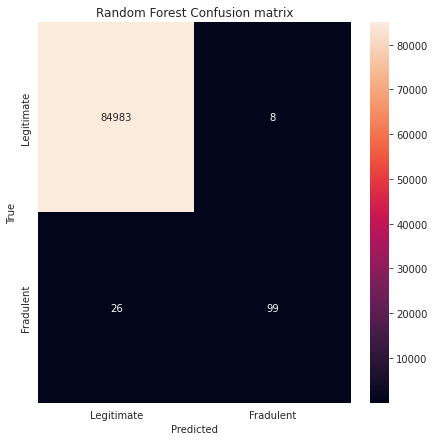

In [68]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

Label = ['Legitimate', 'Fradulent']
conf_matrix = confusion_matrix(y_test, y_predicted)
plt.figure(figsize = (7,7))
sns.heatmap(conf_matrix, xticklabels=Label, yticklabels=Label, annot = True, fmt ="d");

plt.title("Random Forest Confusion matrix")
plt.ylabel("True")
plt.xlabel("Predicted")
plt.show()

# Support Vector Machine

In [69]:
from sklearn import svm

In [70]:
def performSVM(X_train, X_test, y_train, y_test, cost=1, kernel_type='rbf', gamma='scale', deg=3): # returns accuracy and predicted y-values
    model = svm.SVC(C=cost, kernel=kernel_type, gamma=gamma, degree=deg)
    model.fit(X_train, y_train)
    y_prediction = model.predict(X_test)
    n = y_test.size
    #accuracy = (y_test == y_prediction).sum() / n
    accuracy = accuracy_score(y_test, y_prediction)
    cross_entropy = log_loss(y_test, y_prediction)
    return accuracy, cross_entropy
    #return accuracy

In [71]:
# svm_accuracy, y_prediction = performSVM(X_train_slim, X_test_slim, y_train_slim, y_test_slim)
# print(svm_accuracy)

def svmCompareKernels():
  kernels = ['linear', 'poly', 'rbf', 'sigmoid']
  accuracies = np.zeros(len(kernels))
  cross_entropies = np.zeros(len(kernels))
  for i in range(len(kernels)):
    accuracies[i], cross_entropies[i] = performSVM(X_train_slim, X_test_slim, y_train_slim, y_test_slim, cost=1, kernel_type=kernels[i])
    print("kernel:", kernels[i], " Accuracy:", accuracies[i], " Cross Entropy:", cross_entropies[i])
  plt.bar(kernels, accuracies)
  plt.ylabel("Accuracy")
  plt.xlabel("SVM Kernel type")
  #cross entropies
  plt.figure()
  plt.bar(kernels, cross_entropies)
  plt.ylabel("Cross Entropy")
  plt.xlabel("SVM Kernel type")

def svmCompareCosts():
  cost_exp = list(range(-10, 11))
  accuracies = np.zeros(len(cost_exp))
  cross_entropies = np.zeros(len(cost_exp))
  for i in range(len(cost_exp)):
    cost = 2 ** cost_exp[i]
    accuracies[i], cross_entropies[i] = performSVM(X_train_slim, X_test_slim, y_train_slim, y_test_slim, cost=cost, kernel_type='rbf')
    print("cost:", 2 ** cost_exp[i], " Accuracy:", accuracies[i], " Cross Entropy:", cross_entropies[i])
  plt.plot(cost_exp, accuracies)
  plt.ylabel("Accuracy")
  plt.xlabel("Logbase 2 of SVM Cost")
  #cross entropies
  plt.figure()
  plt.plot(cost_exp, cross_entropies)
  plt.ylabel("Cross Entropy")
  plt.xlabel("Logbase 2 of SVM Cost")

def svmComparePolyKernels():
  degrees = list(range(1, 6))
  accuracies = np.zeros(len(degrees))
  cross_entropies = np.zeros(len(degrees))
  for i in range(len(degrees)):
    accuracies[i], cross_entropies[i] = performSVM(X_train_slim, X_test_slim, y_train_slim, y_test_slim, cost=1, kernel_type='poly', deg=degrees[i])
    print("degree:", degrees[i], " Accuracy:", accuracies[i], " Cross Entropy:", cross_entropies[i])
  plt.plot(degrees, accuracies)
  plt.ylabel("Accuracy")
  plt.xlabel("Degree for SVM Poly Kernel")
  #cross entropies
  plt.figure()
  plt.plot(degrees, cross_entropies)
  plt.ylabel("Cross Entropy")
  plt.xlabel("Degree for SVM Poly Kernel")

def svmCompareGamma():
  options = ['scale-rbf', 'auto-rbf', 'scale-poly', 'auto-poly', 'scale-sig', 'auto-sig']
  kernel_options = ['rbf', 'poly', 'sigmoid']
  gamma_options = ['scale', 'auto']
  accuracies = np.zeros(len(options))
  cross_entropies = np.zeros(len(options))
  for i in range(len(options)):
    kernel_type = kernel_options[i // 2]
    gamma_option = gamma_options[i % 2]
    accuracies[i], cross_entropies[i] = performSVM(X_train_slim, X_test_slim, y_train_slim, y_test_slim, cost=1, kernel_type=kernel_type, gamma=gamma_option)
    print("kernel:", kernel_type, " gamma:", gamma_option, " Accuracy:", accuracies[i], " Cross Entropy:", cross_entropies[i])
  plt.bar(options, accuracies)
  plt.ylabel("Accuracy")
  plt.xlabel("Gamma for different kernels")
  #cross entropy
  plt.figure()
  plt.bar(options, cross_entropies)
  plt.ylabel("Cross Entropy")
  plt.xlabel("Gamma for different kernels")

kernel: linear  Accuracy: 0.9470432480141218  Cross Entropy: 1.829071295726977
kernel: poly  Accuracy: 0.928684907325684  Cross Entropy: 2.463139285840214
kernel: rbf  Accuracy: 0.9567519858781994  Cross Entropy: 1.493740123183114
kernel: sigmoid  Accuracy: 0.873433362753751  Cross Entropy: 4.371504208276701


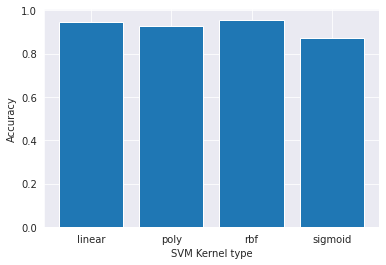

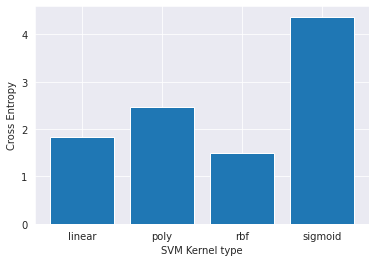

In [72]:
svmCompareKernels()

cost: 0.0009765625  Accuracy: 0.8951456310679612  Cross Entropy: 3.621542026013988
cost: 0.001953125  Accuracy: 0.9041482789055605  Cross Entropy: 3.3106017265359617
cost: 0.00390625  Accuracy: 0.9103265666372462  Cross Entropy: 3.097211228067847
cost: 0.0078125  Accuracy: 0.9225066195939983  Cross Entropy: 2.6765273848103046
cost: 0.015625  Accuracy: 0.9235657546337158  Cross Entropy: 2.639947426823969
cost: 0.03125  Accuracy: 0.9323918799646955  Cross Entropy: 2.335104281024632
cost: 0.0625  Accuracy: 0.9368049426301853  Cross Entropy: 2.18268306099232
cost: 0.125  Accuracy: 0.9410414827890556  Cross Entropy: 2.0363582889039833
cost: 0.25  Accuracy: 0.947396293027361  Cross Entropy: 1.816873459696033
cost: 0.5  Accuracy: 0.9505736981465137  Cross Entropy: 1.7071303393573443
cost: 1  Accuracy: 0.9567519858781994  Cross Entropy: 1.493740123183114
cost: 2  Accuracy: 0.9613415710503089  Cross Entropy: 1.3352223140598845
cost: 4  Accuracy: 0.9675198587819948  Cross Entropy: 1.121832662473

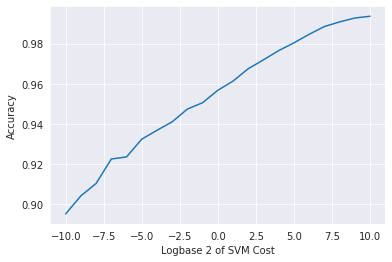

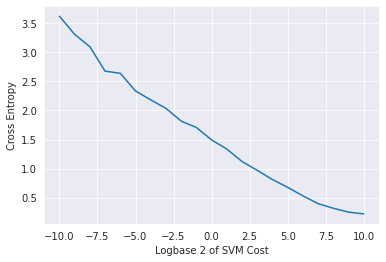

In [73]:
svmCompareCosts()

degree: 1  Accuracy: 0.9428067078552516  Cross Entropy: 1.9753923979948043
degree: 2  Accuracy: 0.9341571050308914  Cross Entropy: 2.274135143735771
degree: 3  Accuracy: 0.928684907325684  Cross Entropy: 2.463139285840214
degree: 4  Accuracy: 0.9129744042365402  Cross Entropy: 3.005758721883568
degree: 5  Accuracy: 0.8954986760812004  Cross Entropy: 3.609350400448521


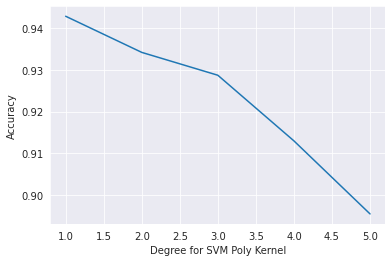

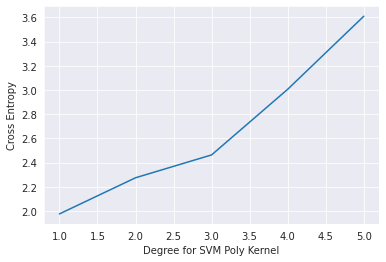

In [74]:
svmComparePolyKernels()

kernel: rbf  gamma: scale  Accuracy: 0.9567519858781994  Cross Entropy: 1.493740123183114
kernel: rbf  gamma: auto  Accuracy: 0.9922330097087378  Cross Entropy: 0.268266998780454
kernel: poly  gamma: scale  Accuracy: 0.928684907325684  Cross Entropy: 2.463139285840214
kernel: poly  gamma: auto  Accuracy: 0.9791703442188879  Cross Entropy: 0.7194385864886367
kernel: sigmoid  gamma: scale  Accuracy: 0.873433362753751  Cross Entropy: 4.371504208276701
kernel: sigmoid  gamma: auto  Accuracy: 0.6135922330097088  Cross Entropy: 13.346207569853005


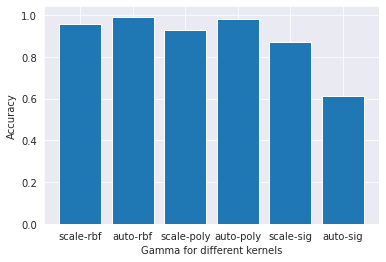

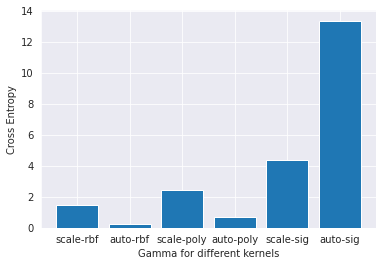

In [75]:
svmCompareGamma()

### Finding optimal SVM hyperparameters

The hyperparameters we want to optimize are:
- Cost (C): The penalty for each misclassified data point. A low value of C will lead to a decision boundary with a larger margin but more misclassification, while a high value of C will lead to a decision boundary with a smaller margin but less misclassified points.
- Kernel: Using kernels are useful when the data cannot be linearly separated and transform the input from a low dimensional space to a higher dimensional space. Kernel types include rbf (radial basis function), linear, polynomial, and sigmoid.
- Gamma: The gamma parameter controls the distance that training points can influence the decision boundary. When gamma is higher, points need to be very close to influence the decision bounary, and when gamma is lower, further away points are also considered.

To find the optimal hyperparameters, we will first determine the best kernel type to use by comparing the accuracies of different kernels. Within each kernel, we will further optimize cost (C), as well as other hyperparameters when applicable (degree for polynomial kernel, gamma for rbf kernel).

In [76]:
class BestMetrics:
  def __init__(self, best_accuracy, best_cross_entropy):
    self.best_accuracy = best_accuracy
    self.best_cross_entropy = best_cross_entropy
  def updateMetricsIfBetter(self, potential_accuracy, potential_ce):
    if (potential_accuracy > self.best_accuracy):
      self.best_accuracy = potential_accuracy
    if (potential_ce < self.best_cross_entropy):
      self.best_cross_entropy = potential_ce

svm_metrics = BestMetrics(0, 1)

In [77]:
class MyPlot:
  def __init__(self):
    (fig, (ax_left, ax_right)) = plt.subplots(1, 2, figsize=(20,10))
    fig.tight_layout()
    self.fig = fig
    self.ax_left = ax_left
    self.ax_right = ax_right

def svmCompareKernelCosts(my_plot, svm_metrics, title, kernel, degree=3, g='scale', label=''):
  costs = [0.01, 0.1, 0.5, 1, 5, 10]
  accuracies = np.zeros(len(costs))
  cross_entropies = np.zeros(len(costs))
  for i in range(len(costs)):
    accuracies[i], cross_entropies[i] = performSVM(X_train_slim, X_test_slim, y_train_slim, y_test_slim, cost=costs[i], kernel_type=kernel, deg=degree, gamma=g)
    print("cost:", costs[i], " Accuracy:", accuracies[i], " Cross Entropy:", cross_entropies[i])
  #update best accuracy and cross entropy
  max_acc = np.max(accuracies)
  min_ce = np.min(cross_entropies)
  svm_metrics.updateMetricsIfBetter(max_acc, min_ce)
  #accuracy plot
  ax = my_plot.ax_left
  if len(label) > 0:
    ax.plot(costs, accuracies, label=label)
    ax.legend(loc="lower right")
  else:
    ax.plot(costs, accuracies)
  ax.set_ylabel("Accuracy")
  ax.set_xlabel("Cost")
  ax.set_title(title)
  #cross entropy plot
  ax = my_plot.ax_right
  title2 = title.replace("Accurac", "Cross Entrop")
  if len(label) > 0:
    ax.plot(costs, cross_entropies, label=label)
    ax.legend(loc="lower right")
  else:
    ax.plot(costs, cross_entropies)
  ax.set_ylabel("Cross Entropy")
  ax.set_xlabel("Cost")
  ax.set_title(title2)

# kernels = ['linear', 'poly', 'rbf', 'sigmoid']

def svmEvalLinear(svm_metrics):
  svmCompareKernelCosts(MyPlot(), svm_metrics, 'SVM Accuracies for Linear Kernel', 'linear')

def svmEvalPoly(svm_metrics):
  degrees = list(range(1, 6))
  my_plot = MyPlot()
  for deg in degrees:
    title = 'SVM Accuracies for Polynomial Kernel with Degrees 1-5'
    svmCompareKernelCosts(my_plot, svm_metrics, title, 'poly', degree=deg, label='Degree = ' + str(deg))
  
def svmEvalRbf(svm_metrics):
  gammas = [0.001, 0.01, 0.1, 1]
  my_plot = MyPlot()
  for gamma in gammas:
    title = 'SVM Accuracies for Rbf Kernel with Different Gamma values'
    svmCompareKernelCosts(my_plot, svm_metrics, title, 'rbf', g=gamma, label='Gamma = ' + str(gamma))

def svmEvalSigmoid(svm_metrics):
  my_plot = MyPlot()
  svmCompareKernelCosts(my_plot, svm_metrics, 'SVM Accuracies for Sigmoid Kernel', 'sigmoid')

cost: 0.01  Accuracy: 0.9454545454545454  Cross Entropy: 1.8839420090146655
cost: 0.1  Accuracy: 0.9475728155339805  Cross Entropy: 1.8107803992786815
cost: 0.5  Accuracy: 0.947396293027361  Cross Entropy: 1.8168775529573702
cost: 1  Accuracy: 0.9470432480141218  Cross Entropy: 1.829071295726977
cost: 5  Accuracy: 0.9479258605472197  Cross Entropy: 1.7985869388029603
cost: 10  Accuracy: 0.9481023830538393  Cross Entropy: 1.792490067418157


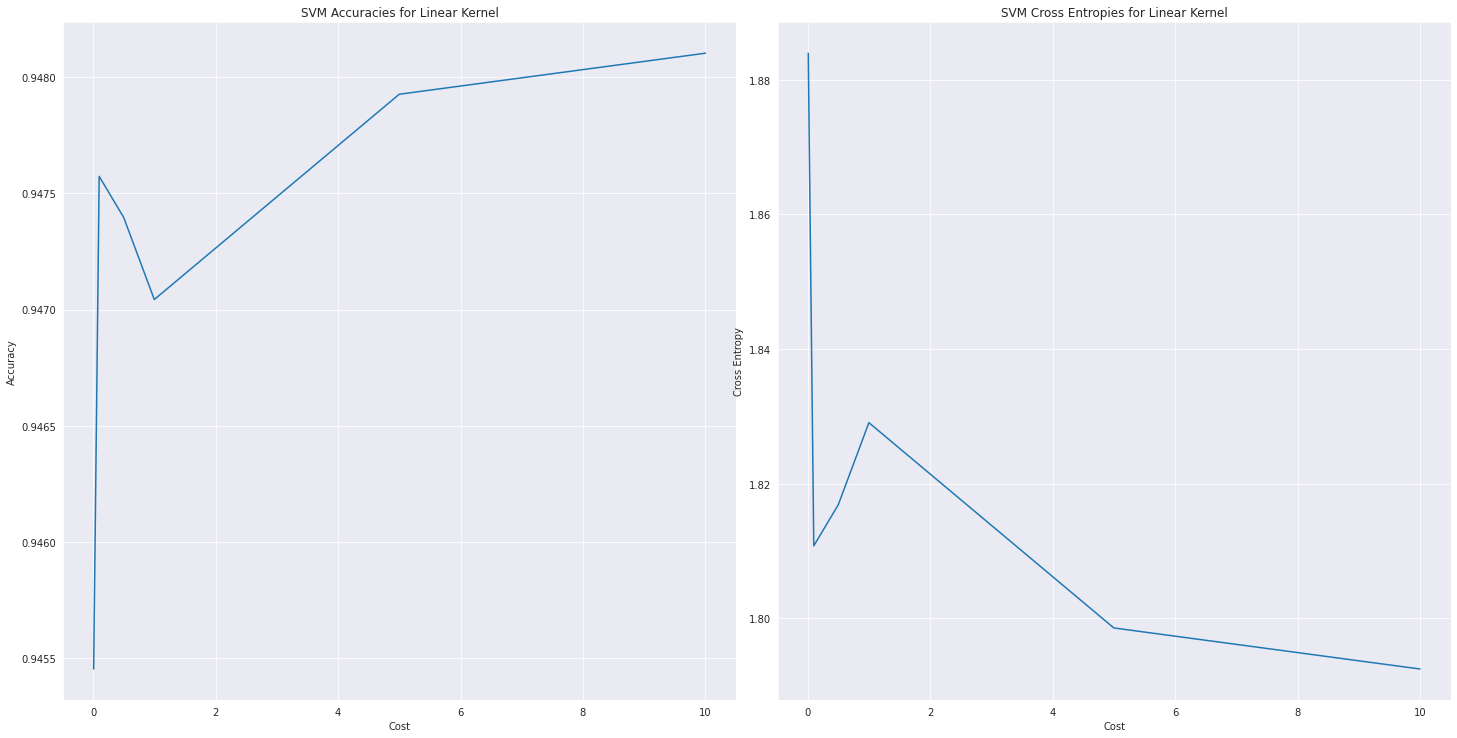

In [78]:
svmEvalLinear(svm_metrics)

cost: 0.01  Accuracy: 0.9221535745807591  Cross Entropy: 2.6887205629921405
cost: 0.1  Accuracy: 0.9369814651368049  Cross Entropy: 2.1765861896075163
cost: 0.5  Accuracy: 0.9403353927625773  Cross Entropy: 2.060747891647337
cost: 1  Accuracy: 0.9428067078552516  Cross Entropy: 1.9753923979948043
cost: 5  Accuracy: 0.9454545454545454  Cross Entropy: 1.8839420090146655
cost: 10  Accuracy: 0.945631067961165  Cross Entropy: 1.8778454199237473
cost: 0.01  Accuracy: 0.8794351279788173  Cross Entropy: 4.1641631558206536
cost: 0.1  Accuracy: 0.9106796116504854  Cross Entropy: 3.085017061857412
cost: 0.5  Accuracy: 0.9302736098852604  Cross Entropy: 2.408266031907558
cost: 1  Accuracy: 0.9341571050308914  Cross Entropy: 2.274135143735771
cost: 5  Accuracy: 0.942630185348632  Cross Entropy: 1.9814857407060404
cost: 10  Accuracy: 0.9493380406001766  Cross Entropy: 1.7498046280835156
cost: 0.01  Accuracy: 0.8556045895851722  Cross Entropy: 4.98724093391604
cost: 0.1  Accuracy: 0.9097969991173874 

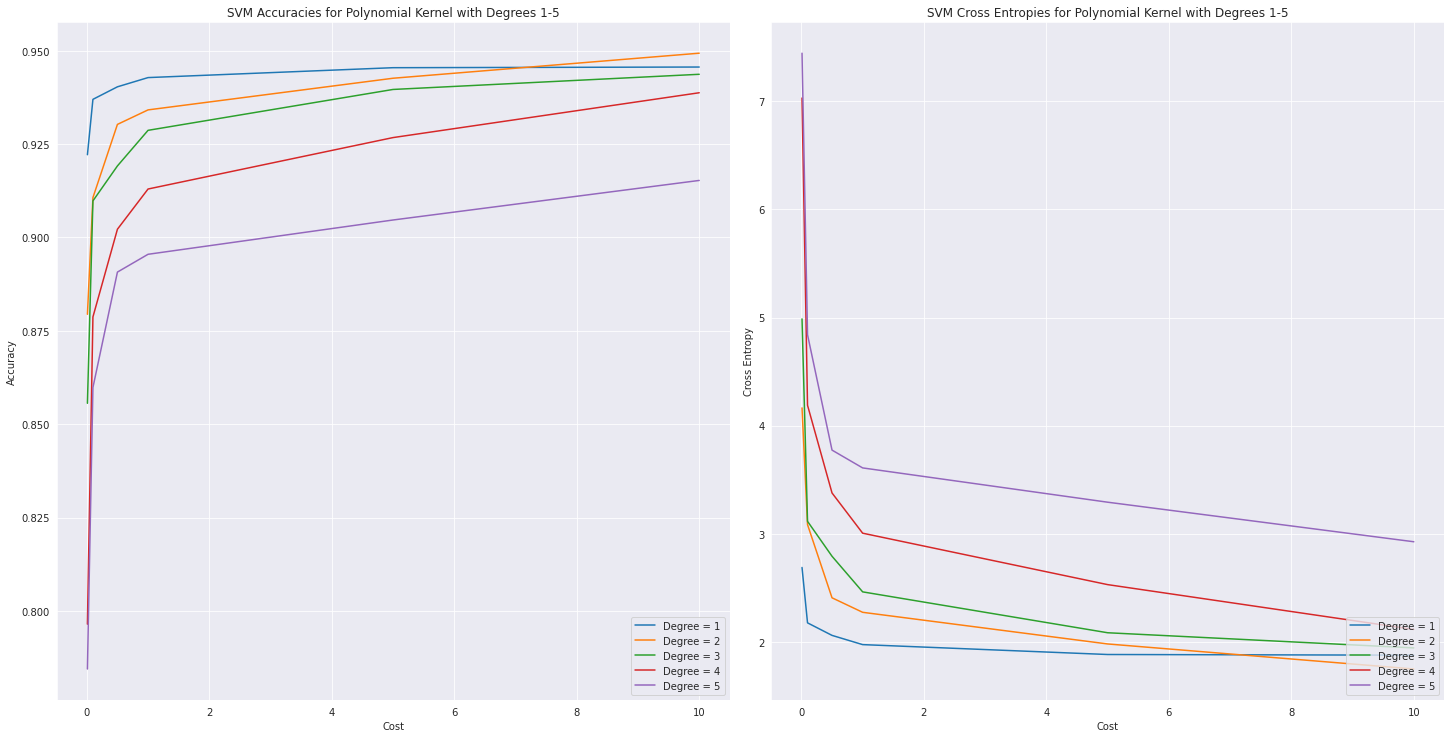

In [79]:
svmEvalPoly(svm_metrics)

cost: 0.01  Accuracy: 0.9216240070609003  Cross Entropy: 2.707011318293493
cost: 0.1  Accuracy: 0.9368049426301853  Cross Entropy: 2.18268306099232
cost: 0.5  Accuracy: 0.9472197705207414  Cross Entropy: 1.822970472227779
cost: 1  Accuracy: 0.9509267431597529  Cross Entropy: 1.6949367377346802
cost: 5  Accuracy: 0.9602824360105914  Cross Entropy: 1.3718038246625894
cost: 10  Accuracy: 0.9646954986760812  Cross Entropy: 1.219382886924163
cost: 0.01  Accuracy: 0.9274492497793468  Cross Entropy: 2.5058233137054295
cost: 0.1  Accuracy: 0.9533980582524272  Cross Entropy: 1.6095809617882622
cost: 0.5  Accuracy: 0.9765225066195939  Cross Entropy: 0.8108919395545714
cost: 1  Accuracy: 0.9811120917917034  Cross Entropy: 0.6523737069905137
cost: 5  Accuracy: 0.9894086496028244  Cross Entropy: 0.36581821125979075
cost: 10  Accuracy: 0.9913503971756399  Cross Entropy: 0.2987520614391838
cost: 0.01  Accuracy: 0.8342453662842012  Cross Entropy: 5.725076418206913
cost: 0.1  Accuracy: 0.98446601941747

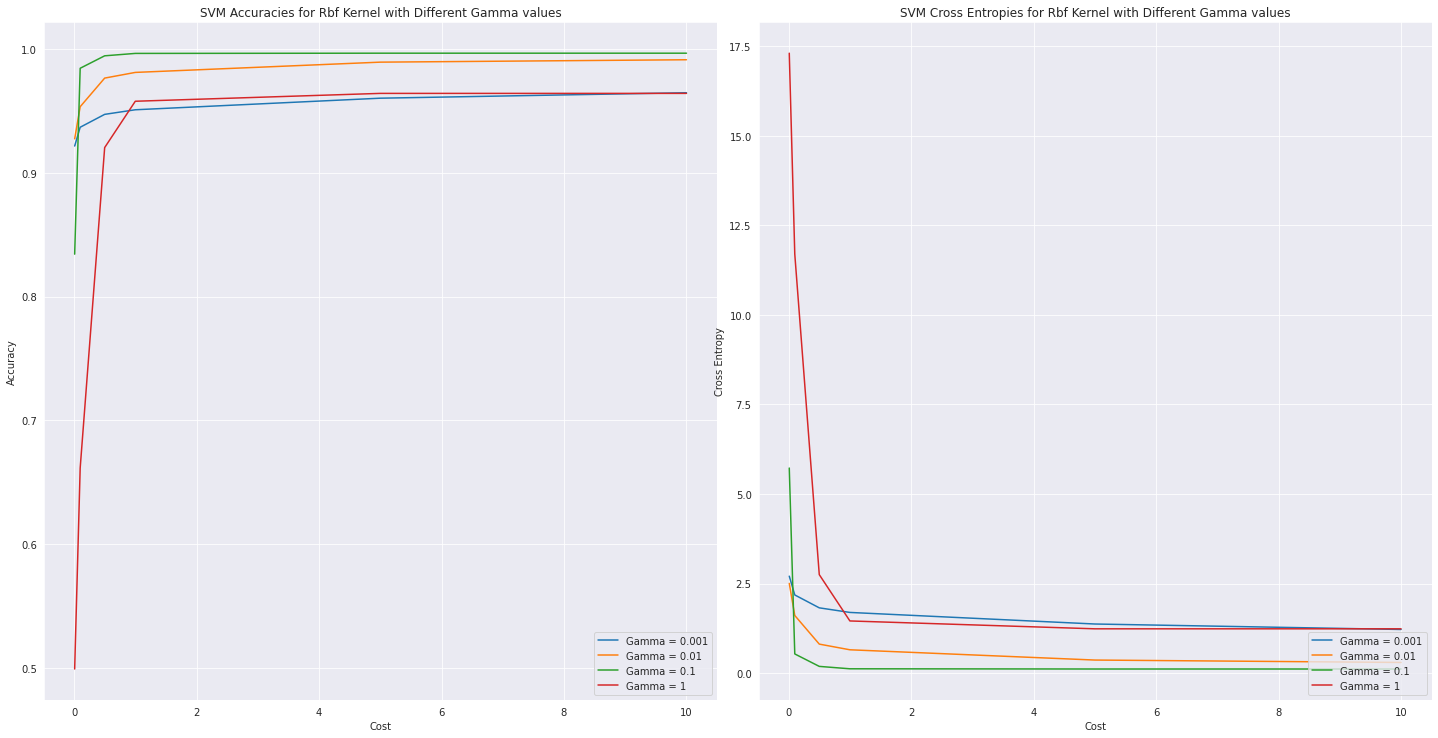

In [80]:
svmEvalRbf(svm_metrics)

cost: 0.01  Accuracy: 0.9071491615180935  Cross Entropy: 3.206959288549529
cost: 0.1  Accuracy: 0.8783759929390997  Cross Entropy: 4.200782493803992
cost: 0.5  Accuracy: 0.8661959399823478  Cross Entropy: 4.621476923082234
cost: 1  Accuracy: 0.873433362753751  Cross Entropy: 4.371504208276701
cost: 5  Accuracy: 0.8727272727272727  Cross Entropy: 4.395892117256741
cost: 10  Accuracy: 0.8727272727272727  Cross Entropy: 4.395892117256741


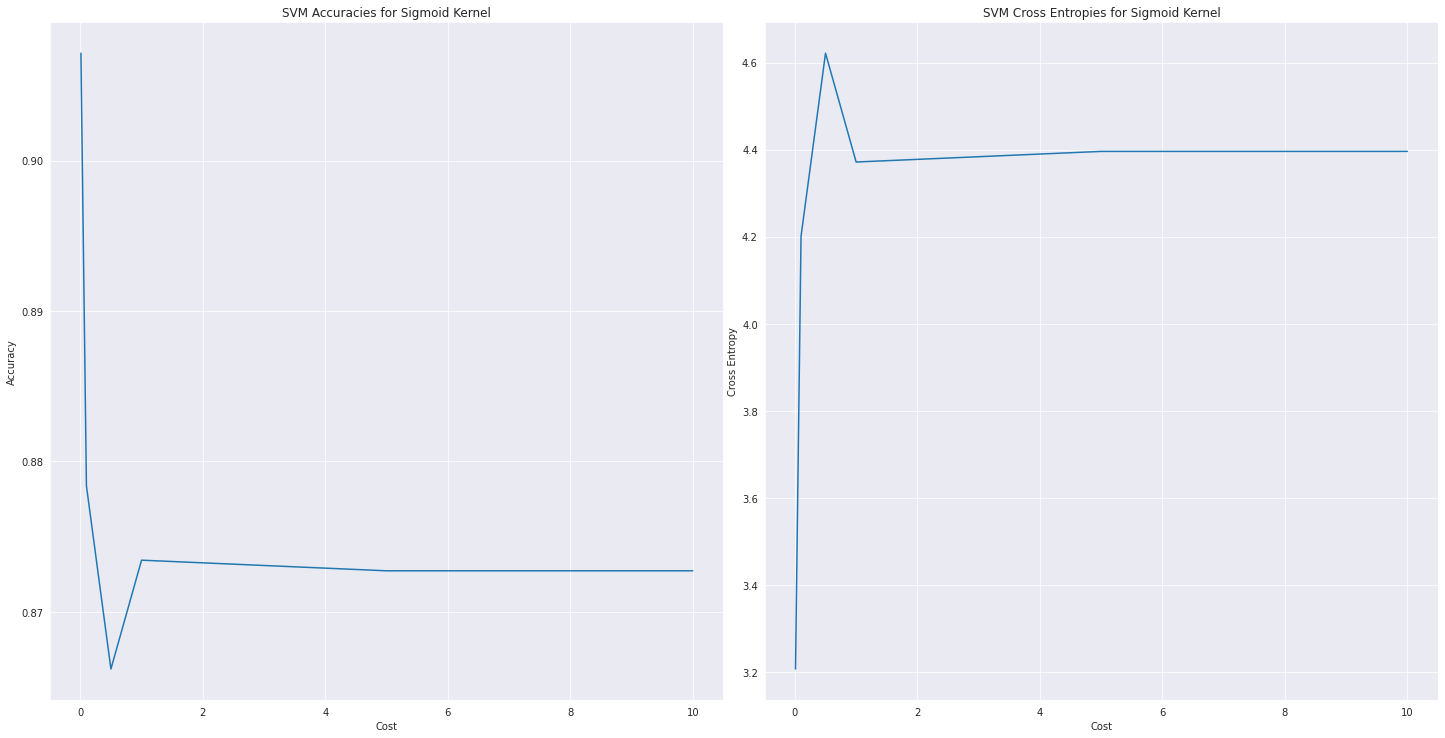

In [81]:
svmEvalSigmoid(svm_metrics,)

In [82]:


def svmCompareKernelCostsFull(svm_metrics, title, kernel, degree=3, g='scale', label=''):
  costs = [0.01, 0.1, 0.5, 1, 5, 10]
  accuracies = np.zeros(len(costs))
  cross_entropies = np.zeros(len(costs))
  for i in range(len(costs)):
    accuracies[i], cross_entropies[i] = performSVM(X_train, X_test, y_train, y_test, cost=costs[i], kernel_type=kernel, deg=degree, gamma=g)
    print("cost:", costs[i], " Accuracy:", accuracies[i], " Cross Entropy:", cross_entropies[i])
  #update best accuracy and cross entropy
  max_acc = np.max(accuracies)
  min_ce = np.min(cross_entropies)
  svm_metrics.updateMetricsIfBetter(max_acc, min_ce)
  #accuracy plot
  if len(label) > 0:
    plt.plot(costs, accuracies, label=label)
    plt.legend(loc="lower right")
  else:
    plt.plot(costs, accuracies)
  plt.ylabel("Accuracy")
  plt.xlabel("Cost")
  plt.title(title)
  #cross entropy plot
  plt.figure()
  title2 = title.replace("Accurac", "Cross Entrop")
  if len(label) > 0:
    plt.plot(costs, cross_entropies, label=label)
    plt.legend(loc="lower right")
  else:
    plt.plot(costs, cross_entropies)
  plt.ylabel("Cross Entropy")
  plt.xlabel("Cost")
  plt.title(title2)

# kernels = ['linear', 'poly', 'rbf', 'sigmoid']

def svmEvalLinearFull(svm_metrics):
  svmCompareKernelCostsFull(svm_metrics, 'SVM Accuracies for Linear Kernel', 'linear')

def svmEvalPolyFull(svm_metrics):
  degrees = list(range(1, 6))
  for deg in degrees:
    title = 'SVM Accuracies for Polynomial Kernel with Degrees 1-5'
    svmCompareKernelCostsFull(svm_metrics, title, 'poly', degree=deg, label='Degree = ' + str(deg))
  
def svmEvalRbfFull(svm_metrics):
  gammas = [0.001, 0.01, 0.1, 1]
  for gamma in gammas:
    title = 'SVM Accuracies for Rbf Kernel with Different Gamma values'
    svmCompareKernelCostsFull(svm_metrics, title, 'rbf', g=gamma, label='Gamma = ' + str(gamma))

def svmEvalSigmoidFull(svm_metrics):
  svmCompareKernelCostsFull(svm_metrics, 'SVM Accuracies for Sigmoid Kernel', 'sigmoid')

In [83]:
#svmEvalLinearFull(svm_metrics)

In [84]:
#svmEvalPolyFull(svm_metrics)

In [85]:
#svmEvalRbfFull(svm_metrics)

In [86]:
#svmEvalSigmoidFull(svm_metrics)

In [87]:
best_SVM_accuracy = svm_metrics.best_accuracy
best_SVM_cross_entropy = svm_metrics.best_cross_entropy

Confusion Matrix - SVM

In [88]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

#Label = ['Legitimate', 'Fradulent']
#conf_matrix = confusion_matrix(y_test, y_prediction)
#plt.figure(figsize = (7,7))
#sns.heatmap(conf_matrix, xticklabels=Label, yticklabels=Label, annot = True, fmt ="d");

#plt.title("SVM Confusion matrix")
#plt.ylabel("True")
#plt.xlabel("Predicted")
#plt.show()

## Results

The rbf kernel performed the best out of all of the kernel types with a maximum accuracy of 99.89%. The linear and polynomial kernels both capped out at a max accuracy of about 95%, and the sigmoid kernel performed the worst with an accuracy of 90.57%. The general trend with cost was that accuracy increased as cost was increased from C=0.01 to C=1 but stagnated afterwards However, unlike the other kernels, the sigmoid kernel decreased in accuracy as the cost increased, with the highest accuracy at C=0.01.

Within the rbf kernel model, we varied both the gamma value and the cost to find the best hyperparameters. A gamma value of 0.1 displayed the highest accuracies, and increasing the cost beyond 1 had little benefit in the accuracy of the model.

# Concluding Visualizations

Accuracies:  [0.996228676159594, 0.9995594247849993, 0.9993127026645989, 0.9995241761207581, 0.9966460723742278, 0.9996005451383994]
Cross Entropies:  [0.13025950363806038, 0.015217027475236764, 0.023738521714736616, 0.0029308314, 0.11584253236846095, 0.013796757298351538]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


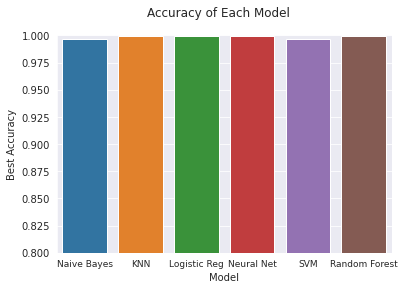

In [89]:
models = ['Naive Bayes', 'KNN', 'Logistic Reg', 'Neural Net', 'SVM', 'Random Forest']
#accuracies = [.926, .998, .946, .9998, .9989, 0]#these were results from before latest run
accuracies = [0.996228676159594, 0.9995594247849993, 0.9993127026645989, 0.9995241761207581, 0.9966460723742278, 0.9996005451383994]
cross_entropies = [0.13025950363806038, 0.015217027475236764, 0.023738521714736616, 0.0029308314, 0.11584253236846095, 0.013796757298351538]
accuracies = [best_GNB_accuracy, best_KNN_accuracy, best_LR_accuracy, best_NN_accuracy, best_SVM_accuracy, best_RF_accuracy]
print("Accuracies: ", accuracies)
cross_entropies = [best_GNB_cross_entropy, best_KNN_cross_entropy, best_LR_cross_entropy, best_NN_cross_entropy, best_SVM_cross_entropy, best_RF_cross_entropy]
print("Cross Entropies: ", cross_entropies)

# plot bar chart
sns.barplot(models, accuracies)
plt.ylim(0.8, 1)
plt.suptitle("Accuracy of Each Model")
plt.xlabel("Model")
plt.ylabel("Best Accuracy")

# Change the fontsize of ticks label 
plt.tick_params(axis='x', labelsize=9)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


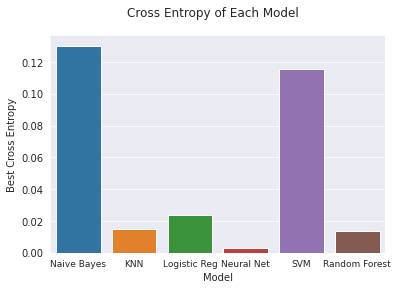

In [90]:
# plot bar chart
sns.barplot(models, cross_entropies)
plt.suptitle("Cross Entropy of Each Model")
plt.xlabel("Model")
plt.ylabel("Best Cross Entropy")

# Change the fontsize of ticks label 
plt.tick_params(axis='x', labelsize=9)

plt.show()